In [177]:
# # Run if using on google collab, change path accordingly
# from google.colab import drive # type: ignore
# drive.mount('/content/drive', force_remount=True)
# path = '/content/drive/MyDrive/Colab Notebooks/ML - LGI/Project_Unsupervised/'

In [178]:
# run if running locally
path = ''

In [179]:
# !pip install git+https://github.com/sevamoo/SOMPY.git #egg=SOMPY
# !pip install scikit-image

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import multiprocessing
import sompy
from sompy.sompy import SOMFactory

cpuc = multiprocessing.cpu_count()-1

#setting seaborn visual style in plt
sns.set_theme()

In [181]:
from tqdm import tqdm

# Integration & Exploration

In [182]:
# dataDF: pd.DataFrame = pd.read_excel(path + 'data/Descriptive_Data.xlsx')
# print(f"Duplicaded: {dataDF.duplicated().sum()}\nMissing: {dataDF.isna().sum().sum()}\nNon-Registered (empty): {(dataDF["Registered"] != "Yes").sum()}")

In [183]:
# import the data and drop remove useless stuff
dataDF: pd.DataFrame = pd.read_excel(path + 'data/Descriptive_Data.xlsx')
dataDF: pd.DataFrame = dataDF.set_index('Userid')
dfSuccess: pd.DataFrame = pd.read_excel(path+'data/Descriptive_Data.xlsx',sheet_name=2)
dfSuccess = dfSuccess.set_index('Userid')
dataDF = dataDF.join(dfSuccess, 'Userid')
dataDF = dataDF.drop('Observations', axis=1).drop_duplicates()
dataDF = dataDF[dataDF['Registered'] == 'Yes']
dataDF = dataDF.drop('Registered', axis=1)

In [184]:
metricFeatures: list[str] = ['Application order','Previous qualification score','Entry score','Age at enrollment','N units credited 1st period',
       'N units taken 1st period', 'N scored units 1st period',
       'N units approved 1st period', 'Average grade 1st period',
       'N unscored units 1st period', 'N units credited 2nd period',
       'N units taken 2nd period', 'N scored units 2nd period',
       'N units approved 2nd period', 'Average grade 2nd period',
       'N unscored units 2nd period','Social Popularity']
categoricalFeatures: list[str] =  ['Application mode','Marital status','Course','Previous qualification','Nationality','Mother\'s qualification',
       'Father\'s qualification','Mother\'s occupation','Father\'s occupation']
boolFeatures: list[str] = ['Morning shift participation','Displaced','Special needs','Debtor','Regularized Fees','Gender_Male','External Funding','International']

academicFeatures: list[str] = ['Previous qualification score','Entry score','N units taken 1st period', 'N scored units 1st period',
       'N units approved 1st period', 'Average grade 1st period',
       'N unscored units 1st period', 'N units credited 2nd period',
       'N units taken 2nd period', 'N scored units 2nd period',
       'N units approved 2nd period', 'Average grade 2nd period',
       'N unscored units 2nd period']
demographicFeatures: list[str] = ['Age at enrollment','Marital status','Course','Previous qualification','Nationality','Mother\'s qualification',
       'Father\'s qualification','Mother\'s occupation','Father\'s occupation','Special needs','International','Debtor','Regularized Fees','Gender_Male']

In [185]:
dataDF[metricFeatures].describe()

Application order  Previous qualification score  Entry score  \
count        4336.000000                   4424.000000  4424.000000   
mean            1.727168                    132.613314   126.978119   
std             1.317108                     13.188332    14.482001   
min             0.000000                     95.000000    95.000000   
25%             1.000000                    125.000000   117.900000   
50%             1.000000                    133.100000   126.100000   
75%             2.000000                    140.000000   134.800000   
max             9.000000                    190.000000   190.000000   

       Age at enrollment  N units credited 1st period  \
count        4336.000000                  4336.000000   
mean           23.271679                     0.711255   
std             7.593933                     2.367723   
min            17.000000                     0.000000   
25%            19.000000                     0.000000   
50%            20.000000                     0.000000   
75%            25.000000                     0.000000   
max            70.000000                    20.000000   

       N units taken 1st period  N scored units 1st period  \
count               4336.000000                4336.000000   
mean                   6.264991                   8.297048   
std                    2.477978                   4.181946   
min                    0.000000                   0.000000   
25%                    5.000000                   6.000000   
50%                    6.000000                   8.000000   
75%                    7.000000                  10.000000   
max                   26.000000                  45.000000   

       N units approved 1st period  Average grade 1st period  \
count                  4336.000000               4424.000000   
mean                      4.711716                 10.640822   
std                       3.101945                  4.843663   
min                       0.000000                  0.000000   
25%                       3.000000                 11.000000   
50%                       5.000000                 12.285714   
75%                       6.000000                 13.400000   
max                      26.000000                 18.875000   

       N unscored units 1st period  N units credited 2nd period  \
count                   4336.00000                  4336.000000   
mean                       0.13953                     0.547279   
std                        0.69710                     1.931605   
min                        0.00000                     0.000000   
25%                        0.00000                     0.000000   
50%                        0.00000                     0.000000   
75%                        0.00000                     0.000000   
max                       12.00000                    19.000000   

       N units taken 2nd period  N scored units 2nd period  \
count               4336.000000                4336.000000   
mean                   6.226937                   8.060655   
std                    2.197235                   3.942173   
min                    0.000000                   0.000000   
25%                    5.000000                   6.000000   
50%                    6.000000                   8.000000   
75%                    7.000000                  10.000000   
max                   23.000000                  33.000000   

       N units approved 2nd period  Average grade 2nd period  \
count                  4336.000000               4424.000000   
mean                      4.431734                 10.230206   
std                       2.996183                  5.210808   
min                       0.000000                  0.000000   
25%                       2.000000                 10.750000   
50%                       5.000000                 12.200000   
75%                       6.000000                 13.333333   
max                      20.000000        

In [186]:
for variable in categoricalFeatures:
  print(dataDF[variable].value_counts())

Application mode
1.0    1725
0.0    1640
2.0     850
3.0     121
Name: count, dtype: int64
Marital status
single               3919
married               379
divorced               91
facto union            25
legally separated       6
widower                 4
Name: count, dtype: int64
Course
Nursing                                 766
Management                              380
Social Service                          355
Veterinary Nursing                      337
Journalism and Communication            331
Management (evening attendance)         268
Advertising and Marketing Management    268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Social Service (evening attendance)     215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equinculture                            141
Oral Hygiene                             86
B

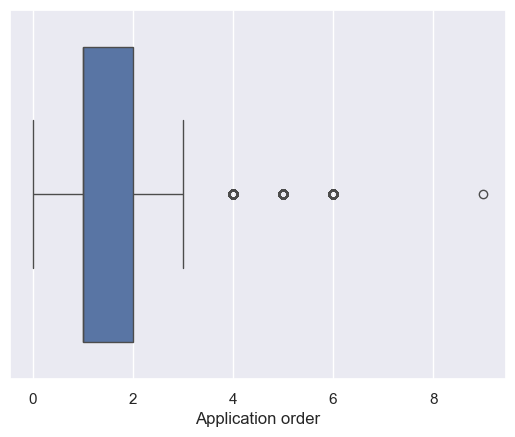

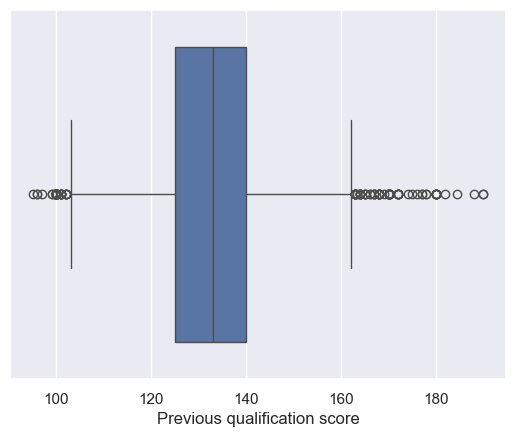

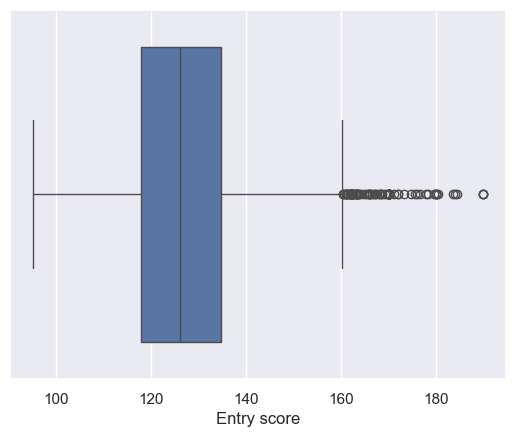

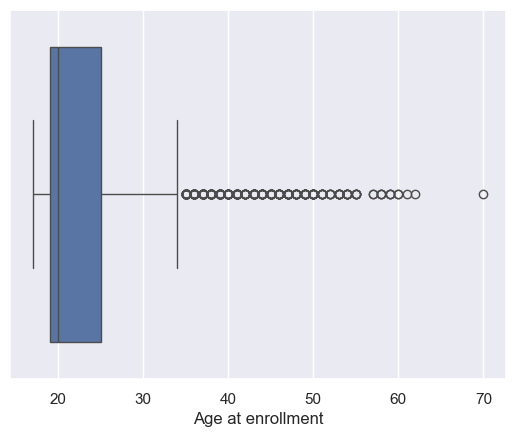

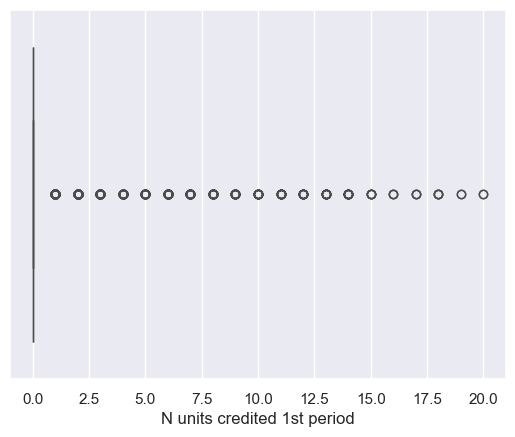

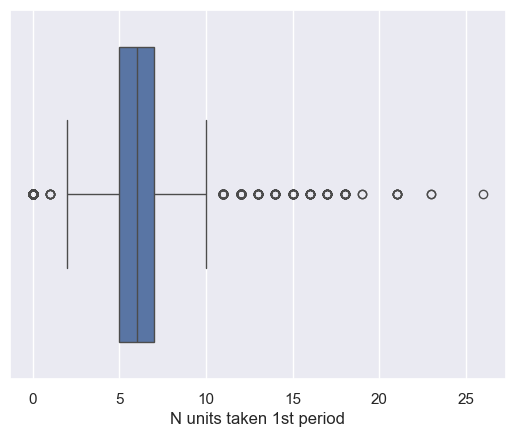

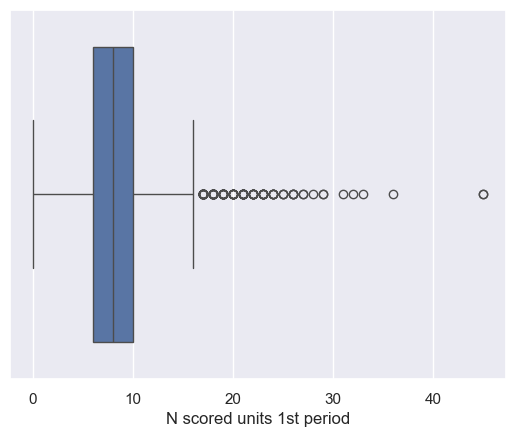

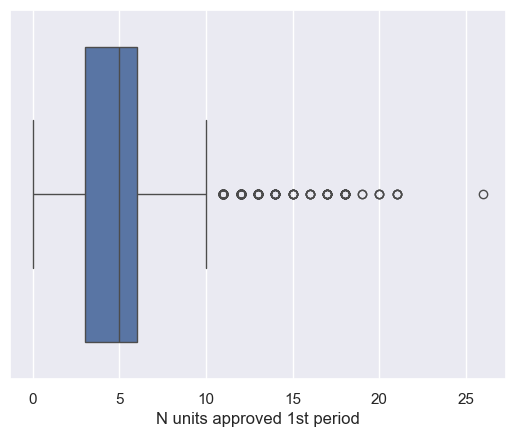

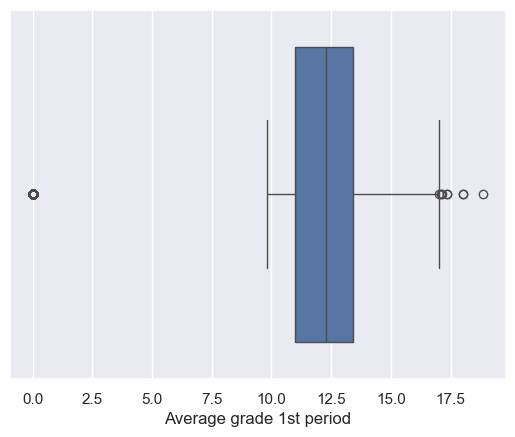

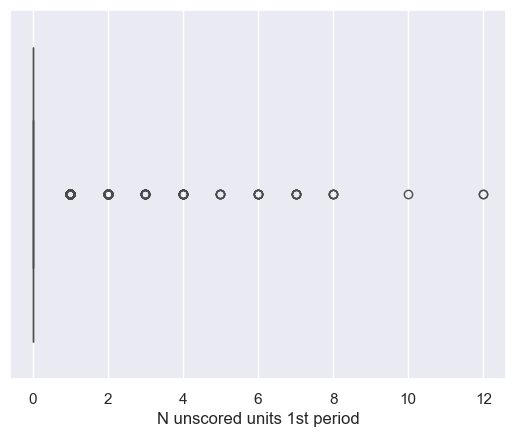

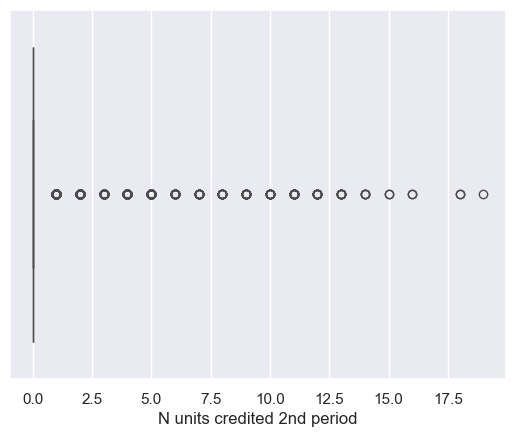

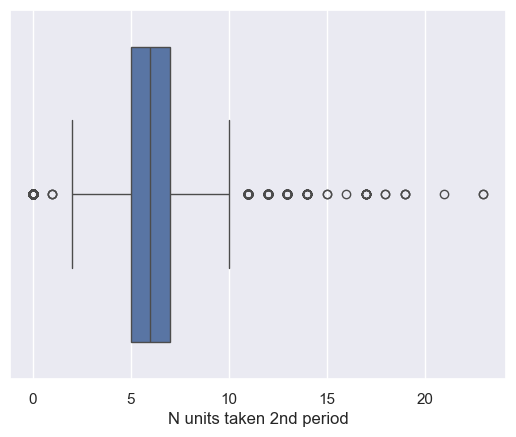

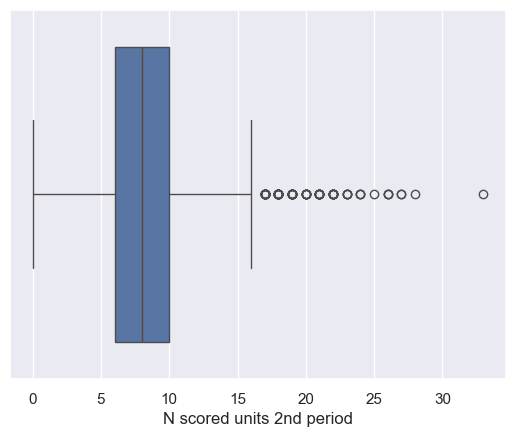

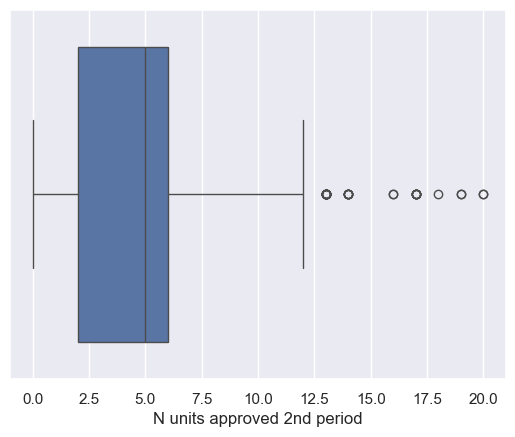

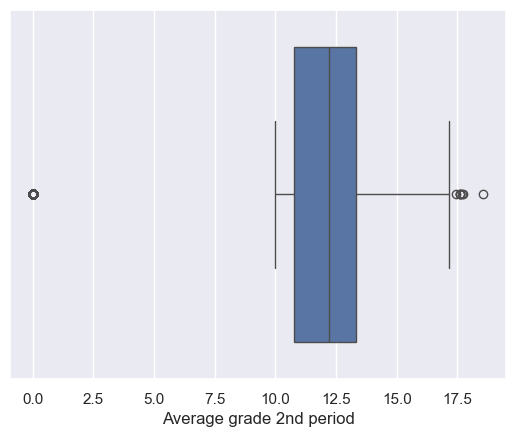

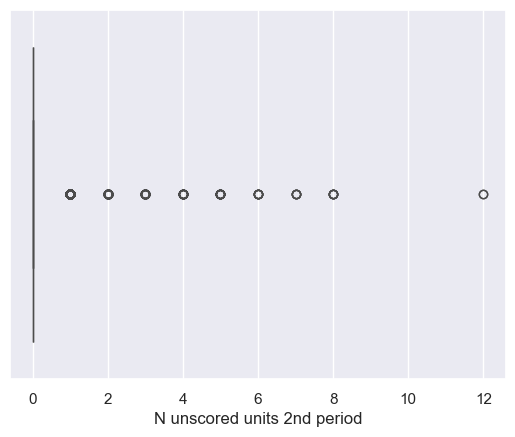

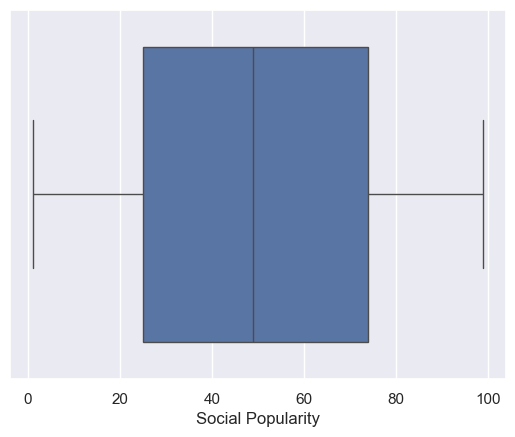

In [187]:
for i, col in enumerate(metricFeatures):
  plt.figure(i)
  sns.boxplot(x=col, data=dataDF)

In [188]:
# mn.matrix(data)

In [189]:
# percentage of empty values in a column
round(dataDF.isnull().sum() / dataDF.shape[0] * 100.00,2)

Marital status                  0.00
Application mode                1.99
Application order               1.99
Course                          0.00
Morning shift participation     1.99
Previous qualification          0.05
Previous qualification score    0.00
Nationality                     0.00
Mother's qualification          2.94
Father's qualification          2.62
Mother's occupation             0.38
Father's occupation             1.20
Entry score                     0.00
Displaced                       1.99
Special needs                   1.99
Debtor                          1.99
Regularized Fees                1.99
Gender_Male                     1.99
External Funding                1.99
Age at enrollment               1.99
International                   1.99
N units credited 1st period     1.99
N units taken 1st period        1.99
N scored units 1st period       1.99
N units approved 1st period     1.99
Average grade 1st period        0.00
N unscored units 1st period     1.99
N

# Preprocessing

In [190]:
def fillNa(data: pd.DataFrame) -> pd.DataFrame:
    """Fill missing values

    Args:
        data (`pd.DataFrame`): Dataframe to be treated

    Returns:
        `pd.DataFrame`: Treated dataframe
    """

    # on all of these features, if a value were to be different than 0, then it would not be missing, eg units approved, if the student approved, the value wouldn't be missing
    ifNaThen0: tuple[str,...] = (
        "N units credited 1st period",
        "N unscored units 1st period",
        "N scored units 1st period",
        "N units credited 2nd period",
        "N unscored units 2nd period",
        "N scored units 2nd period"
    )

    # these features are filled differently, basically incoherence checking, but filling the Na on 'N units approved 1st/2nd period' is needed beforehand, more info below
    checkAfterVars: list[list[str]] = [
        ["N units taken 1st period", "N scored units 1st period"],
        ["N units taken 2nd period", "N scored units 2nd period"]
    ]

    for var in metricFeatures:
        if var == (checkAfterVars[0][0] or checkAfterVars[1][0]):
            continue # skip current iteration
        if var in ifNaThen0:
            data[var] = data[var].fillna(0) # fill the ifNaThen0 vars with well, 0s
        else:
            data[var] = data[var].fillna(data[var].median()) # fill everything else with the median of the values of the feature

    # here we use the n units taken features we skipped earlier, a student has to have taken at least the same number of courses as the number of courses they passed
    for varList in checkAfterVars:
        # search for Na values on N units taken and replace by the equivalent value on N units approved
        data.loc[data[varList[0]].isna(), varList[0]] = data[varList[1]]
        # search for values on N units taken that are smaller than the equivalent on N units approved, replace by the equivalent value on N units approved
        data.loc[data[varList[0]] < data[varList[1]], varList[0]] = data[varList[1]]

    for var in boolFeatures:
        if var == "Regularized Fees":
            data[var] = data[var].fillna(1) # if nothing is said about the fees, we can assume they have been paid
        else:
            data[var] = data[var].fillna(0) # here is like the ifNaThen0 situation, if the values were to not be 0, they would have been declared

    return data

In [191]:
def removeOutliers(data: pd.DataFrame) -> pd.DataFrame:
    """Removes outliers and fixes any negative number incoherences on the selected variables from the dataframe

    Args:
        data (`pd.DataFrame`): Dataframe to be treated

    Returns:
        `pd.DataFrame`: Treated dataframe
    """

    toBeTreated: dict[str, dict[str, float | None]] = {
        "Application order": {"lower": 0, "upper": None},
        "Previous qualification score": {"lower": 0, "upper": None},
        "Entry score": {"lower": 0, "upper": None},
        "Age at enrollment": {"lower": 0, "upper": None},
        "N units credited 1st period": {"lower": 0, "upper": 15},
        "N units taken 1st period": {"lower": 0, "upper": 20},
        "N scored units 1st period": {"lower": 0, "upper": 25},
        "N units approved 1st period": {"lower": 0, "upper": 20},
        "Average grade 1st period": {"lower": 0, "upper": None},
        "N unscored units 1st period": {"lower": 0, "upper": None},
        "N units credited 2nd period": {"lower": 0, "upper": 14},
        "N units taken 2nd period": {"lower": 0, "upper": 15},
        "N scored units 2nd period": {"lower": 0, "upper": 25},
        "N units approved 2nd period": {"lower": 0, "upper": 15},
        "Average grade 2nd period": {"lower": 0, "upper": None},
        "N unscored units 2nd period": {"lower": 0, "upper": None},
        "Social Popularity": {"lower": 0, "upper": 100},
    }

    for var in toBeTreated:
        if toBeTreated[var]["lower"] != None:
            toRemove: list = list(data.loc[data[var] < toBeTreated[var]["lower"], var].index)
        if toBeTreated[var]["upper"] != None:
            toRemove.extend(list(data.loc[data[var] > toBeTreated[var]["upper"], var].index))
        data.drop(toRemove, axis=0, inplace=True)

    return data

In [192]:
def groupValues(data: pd.DataFrame) -> pd.DataFrame:
    """replace values on columns that have lots of different values that can be grouped together to reduce the total number of dummies created after

    Args:
        data (`pd.DataFrame`): Dataframe to be treated

    Returns:
        `pd.DataFrame`: Treated dataframe
    """

    # for col in ["Mother's qualification",  "Father's qualification", "Previous qualification"]:
    #     data.replace(regex={col: {r"(?i)^no school.*$": '0',
    #                         r"(?i)^[0-4][a-z]{2} grade.*$": '1',
    #                         r"(?i)^[5-9]th grade.*$": '2',
    #                         r"(?i)^1[0-2]th grade.*$": '3',
    #                         r"(?i)^incomplete bachelor.*$": '4',
    #                         r"(?i)^bachelor degree.*$": '5',
    #                         r"(?i)^post-grad.*$": '6',
    #                         r"(?i)^master degree.*$": '7',
    #                         r"(?i)^phd.*$": '8',}}, inplace=True)
    education={
        '12th grade':'Middle',
        '9th grade':'Lower',
        '11th grade':'Middle',
        '12th grade - Technological specialization course':'Middle',
        '12th grade - Commerce Course':'Middle',
        '10th grade':'Middle',
        '12th grade - Technical-professional course':'Middle',
        '7th grade': 'Lower',
        '4th grade':'Lower',
        '6th grade':'Lower',
        '8th grade':'Lower',
        '3rd grade':'Lower',
        'Bachelor degree':'Higher',
        'Master degree':'Higher',
        'PhD':'Higher',
        'Post-Graduation':'Higher',
        'Incomplete Bachelor\'s':'Higher',
        'No School': 'None'
      }

    data['Father\'s qualification'].replace(education,inplace=True)
    data['Mother\'s qualification'].replace(education,inplace=True)
    data['Previous qualification'].replace(education,inplace=True)

    for col in ["Mother's occupation", "Father's occupation"]:
          data.replace(to_replace={col: ["Superior-level Professional", "Intermediate-level Professional", "Politician/CEO", "Teacher", "Information Technology Specialist"]}, value="Professional Fields", inplace=True)
          data.replace(to_replace={col: ["Skilled construction workers", "Assembly Worker", "Factory worker", "Lab Technocian"]}, value="Technical and Skilled Trades", inplace=True)
          data.replace(to_replace={col: ["Administrative Staff", "Office worker", "Accounting operator"]}, value="White collar Jobs", inplace=True)
          data.replace(to_replace={col: ["Restaurant worker", "Personal care worker", "Seller", "Cleaning worker"]}, value="Service Industry", inplace=True)
          data.replace(to_replace={col: ["Private Security", "Armed Forces"]}, value="Security and Armed Forces", inplace=True)
          data.replace(to_replace={col: ["Unskilled Worker", "Other", "Student", "Artist"]}, value="Recreational or unskilled", inplace=True)
          data.replace(to_replace={col: ["Engineer", "Scientist", "Health professional"]}, value="STEM Jobs", inplace=True)

    data.replace(to_replace={"Marital status": {
        'single':'alone',
        'divorced':'alone',
        'legally separated':'alone',
        'widower':'alone',
        'married':'together',
        'facto union':'together'
    }}, inplace=True)

    return data

In [193]:
def getDummies(data: pd.DataFrame) -> pd.DataFrame:
    """get dummies

    Args:
        train (`pd.DataFrame`): Train dataframe to be treated

    Returns:
        `pd.DataFrame` : treated dataframe
    """

    data = pd.get_dummies(data=data, prefix_sep="-", dummy_na=True, drop_first=False)

    return data

In [194]:
from pandas.core.frame import DataFrame
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing._data import MinMaxScaler


def scaleData(data: pd.DataFrame) -> tuple[pd.DataFrame, MinMaxScaler]:
    """Tranforms the values in the dataframe to fit in a scale of 0 to 1

    Args:
        train (pd.DataFrame): Unscaled train dataframe

    Returns:
        pd.DataFrame: Scaled dataframe
    """

    scaler = MinMaxScaler()
    scaler.fit(data)

    data = pd.DataFrame(scaler.transform(data), columns = data.columns, index = data.index)

    return data, scaler

In [195]:
def encodeSuccess(successData: pd.DataFrame) -> pd.DataFrame:
    """Replace string values on success by integers

    Args:
        successData (pd.DataFrame): Untreated dataframe

    Returns:
        pd.DataFrame: Treated dataframe
    """
    successData.replace({'Success': {"Gave up": 0, "Holding on": 1, "Succeeded": 2}}, inplace=True)

    return successData

In [196]:
def prepData(data: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """Runs the preprocessing steps on the dataframe

    Args:
        data (pd.DataFrame): Un-preprocessed data dataframe

    Returns:
        pd.DataFrame: Treated dataframe
    """

    data = encodeSuccess(data)
    data = fillNa(data)
    data = removeOutliers(data)
    data = groupValues(data)
    dataAcademic: pd.DataFrame = data[academicFeatures]
    dataDemographic: pd.DataFrame = data[demographicFeatures]
    dataAcademic = getDummies(dataAcademic)
    dataDemographic = getDummies(dataDemographic)
    dataAcademic = scaleData(dataAcademic)
    dataDemographic = scaleData(dataDemographic)
    data = getDummies(data)
    data = scaleData(data)

    return data, dataAcademic, dataDemographic

# Feature Selection

In [197]:
def pairPlots(data: pd.DataFrame,fileName: str) -> None:
    sns.pairplot(data.sample(1000)).savefig(f"./output/{fileName}.png")

# Feature engineering

In [198]:
def addAverages(data):
  data['Average grades']=(data['Average grade 1st period']+data['Average grade 2nd period'])/2
  data['Average units taken']=(data['N units taken 1st period']+data['N units taken 2nd period'])/2
  data['Average scored units']=(data['N scored units 1st period']+data['N scored units 2nd period'])/2
  data['Average units approved']=(data['N units approved 1st period']+data['N units approved 2nd period'])/2
  data['Average units credited']=(data['N units credited 1st period']+data['N units credited 2nd period'])/2
  data['Average unscored units']=(data['N unscored units 1st period']+data['N unscored units 2nd period'])/2

  data['Unit load']=data['N units credited 1st period']+data['N units credited 2nd period']

In [199]:
# data['Average grades']=(data['Average grade 1st period']+data['Average grade 2nd period'])/2
# data['Average units taken']=(data['N units taken 1st period']+data['N units taken 2nd period'])/2
# data['Average scored units']=(data['N scored units 1st period']+data['N scored units 2nd period'])/2
# data['Average units approved']=(data['N units approved 1st period']+data['N units approved 2nd period'])/2
# data['Average units credited']=(data['N units credited 1st period']+data['N units credited 2nd period'])/2
# data['Average unscored units']=(data['N unscored units 1st period']+data['N unscored units 2nd period'])/2

# data['Unit load']=data['N units credited 1st period']+data['N units credited 2nd period']

In [200]:
# dataDF['Average grades']=(dataDF['Average grade 1st period']+dataDF['Average grade 2nd period'])/2
# dataDF['Average units taken']=(dataDF['N units taken 1st period']+dataDF['N units taken 2nd period'])/2
# dataDF['Average scored units']=(dataDF['N scored units 1st period']+dataDF['N scored units 2nd period'])/2
# dataDF['Average units approved']=(dataDF['N units approved 1st period']+dataDF['N units approved 2nd period'])/2
# dataDF['Average units credited']=(dataDF['N units credited 1st period']+dataDF['N units credited 2nd period'])/2
# dataDF['Average unscored units']=(dataDF['N unscored units 1st period']+dataDF['N unscored units 2nd period'])/2

# dataDF['Unit load']=dataDF['N units credited 1st period']+dataDF['N units credited 2nd period']

# SOM function

In [201]:
def somFunc(df_som,rows,cols,umat=False,componentPlanes=False,componentColumns=[]):
  mapsize=[rows,cols]
  som = SOMFactory().build(df_som, mapsize, mask=None,
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'
  som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

  if umat == True:
    u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

  #This is the Umat value
  UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

  #Here you have Umatrix plus its render
  _, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

  if componentPlanes == True:
    som.component_names = componentColumns
    comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes', text_size=8)
    comp_planes.show(som, what='codebook', which_dim='all', col_sz=8)

  return som

In [202]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)

    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)

        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        color = sns.color_palette('Dark2')

        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=color, ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=16, fontweight = 'heavy')
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=16)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=16)


    plt.subplots_adjust(hspace=0.4, top=0.90, bottom = 0.2)
    plt.suptitle("Cluster Profiling", fontsize=23)
    plt.show()

#AcademData

In [203]:
dataDF = fillNa(dataDF)
addAverages(dataDF)

In [204]:
academicData=['Entry score','Average scored units','Average grades','Average units taken','Average units approved','Average units credited','Average unscored units','Success']

In [205]:
data = encodeSuccess(dataDF)
# data = fillNa(data)
data = removeOutliers(data)
data = groupValues(data)
dataAcademicDF = data[academicData]
dataAcademic = getDummies(dataAcademicDF)
dataAcademic, academicScaler = scaleData(dataAcademicDF)
data = getDummies(data)
data, scaler = scaleData(data)
dataAcademicDF, academicScaler=scaleData(dataAcademicDF)

C:\Users\carva\AppData\Local\Temp\ipykernel_21956\3894077080.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  successData.replace({'Success': {"Gave up": 0, "Holding on": 1, "Succeeded": 2}}, inplace=True)
C:\Users\carva\AppData\Local\Temp\ipykernel_21956\3712914929.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on t

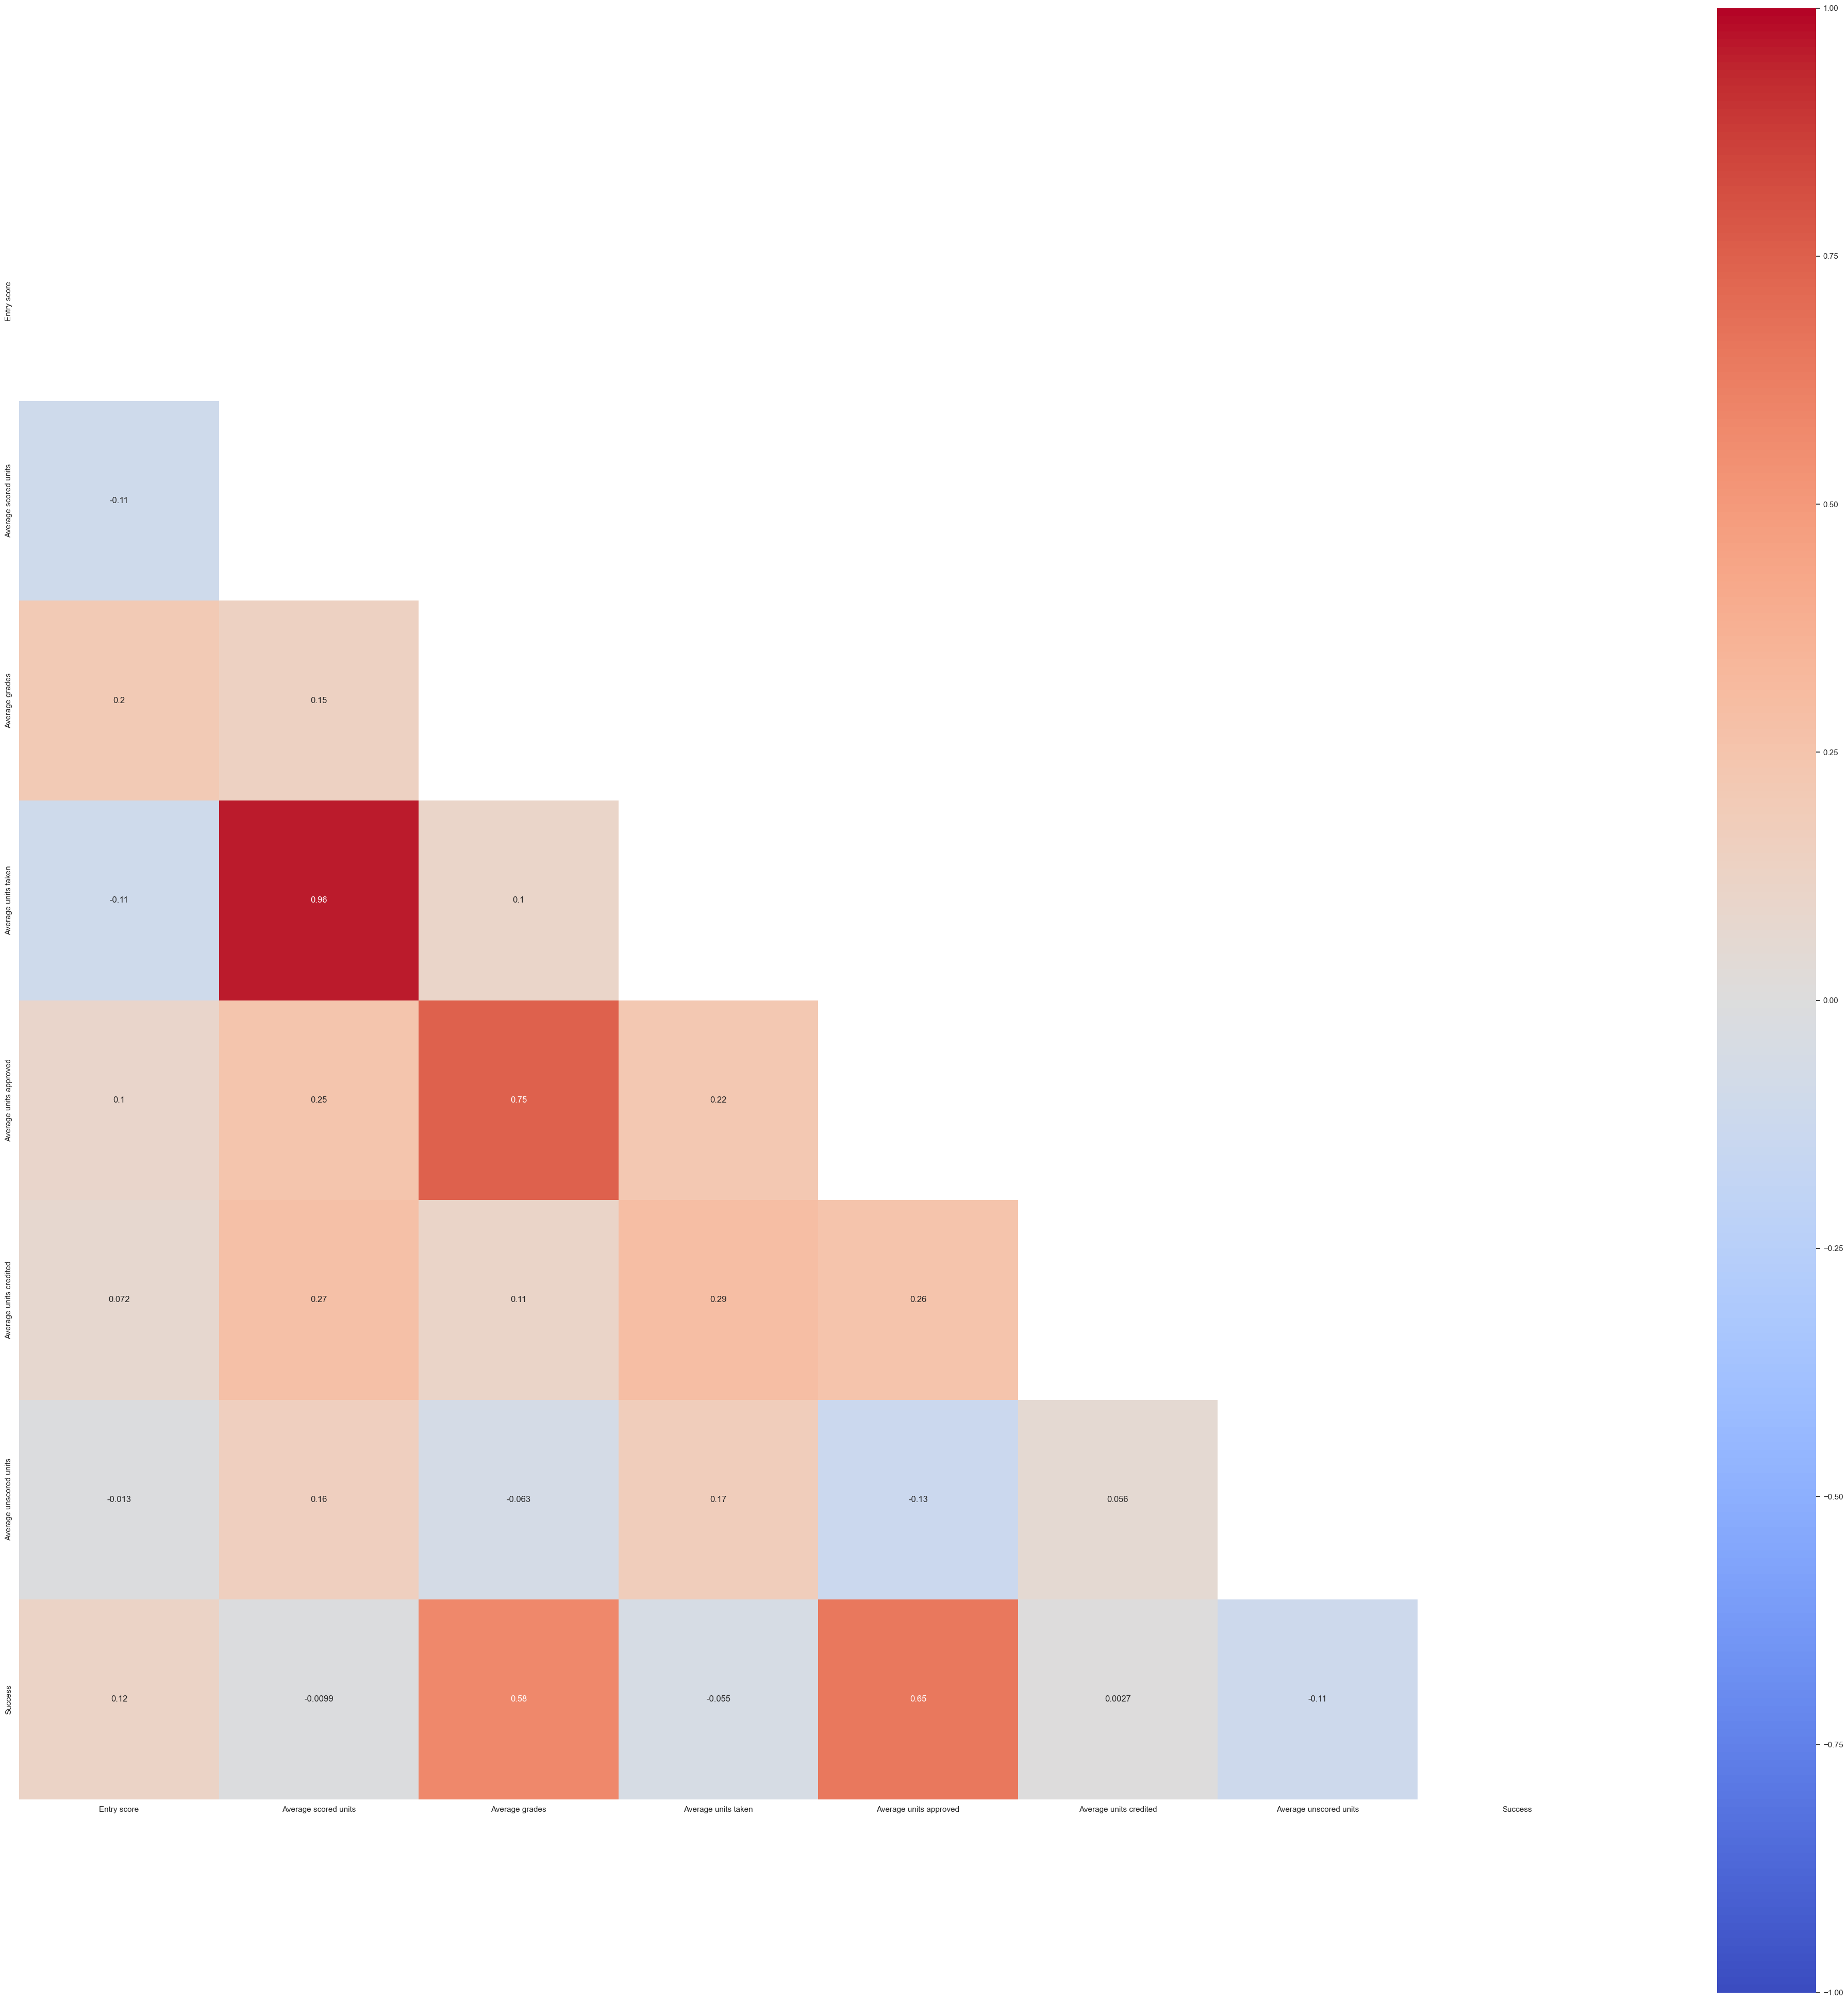

In [206]:
mask = np.zeros_like(dataAcademicDF.corr("spearman"))
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(50,50))
    ax = sns.heatmap(dataAcademicDF.corr("spearman"),mask=mask, annot = True,cmap='coolwarm',square=True,vmin=-1, vmax=1)

In [207]:
cor_spearman = dataAcademicDF[dataAcademicDF.columns].corr(method='spearman')
cor_spearman

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# display only highly correlated (>=80%) features
threshold=0.8

mask = cor_spearman.abs() > threshold

high_cor = cor_spearman[mask].stack().reset_index()
high_cor.columns = ['Feature 1', 'Feature 2', 'Correlation']

# filter out where Feature1==Feature2
mask = high_cor['Feature 1'] == high_cor['Feature 2']
high_cor_filtered = high_cor[~mask]

high_cor_filtered

Feature 1             Feature 2  Correlation
2  Average scored units   Average units taken     0.958202
4   Average units taken  Average scored units     0.958202

In [208]:
dataAcademicDF.drop('Average units taken',axis=1,inplace=True)
academicData.remove('Average units taken')

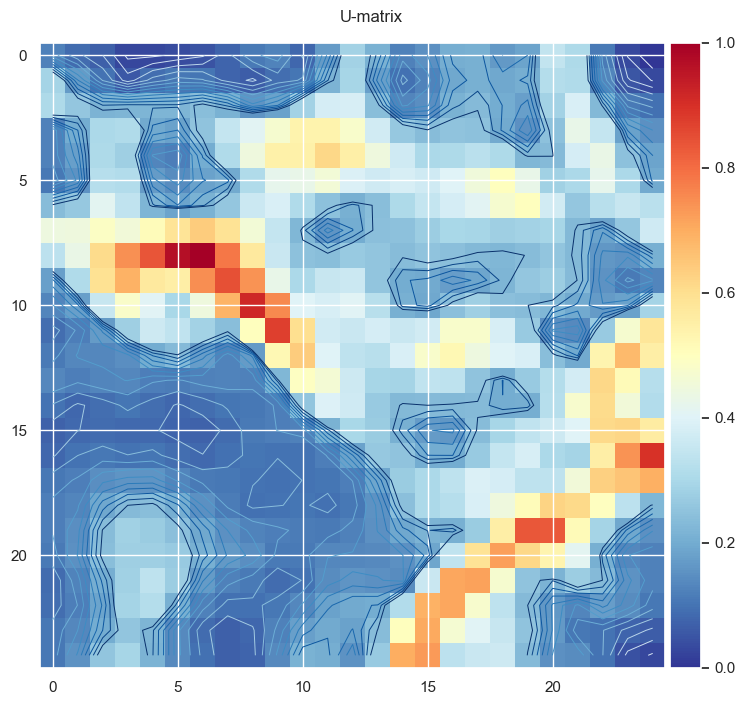

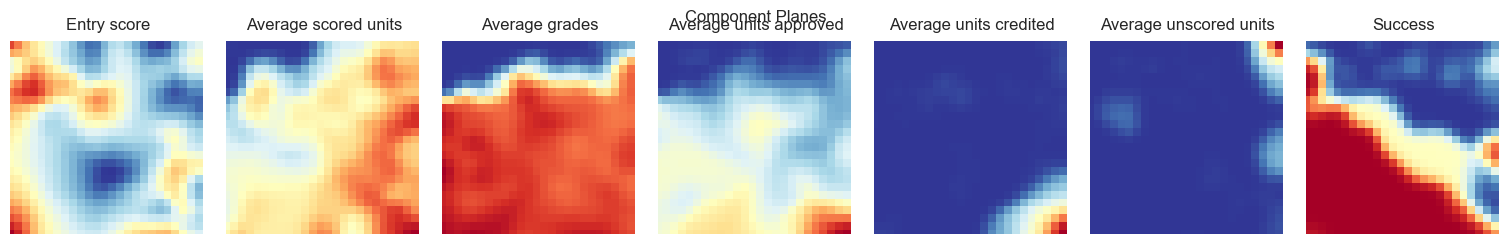

In [209]:
som=somFunc(np.float32(dataAcademicDF),25,25,True,True,dataAcademicDF.columns)

In [210]:
# cl = som.cluster(n_clusters=4)
bmus = som.project_data(dataAcademicDF)
som.cluster(n_clusters=3)
labels = getattr(som, 'cluster_labels')

e:\GitHub\mlproj\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


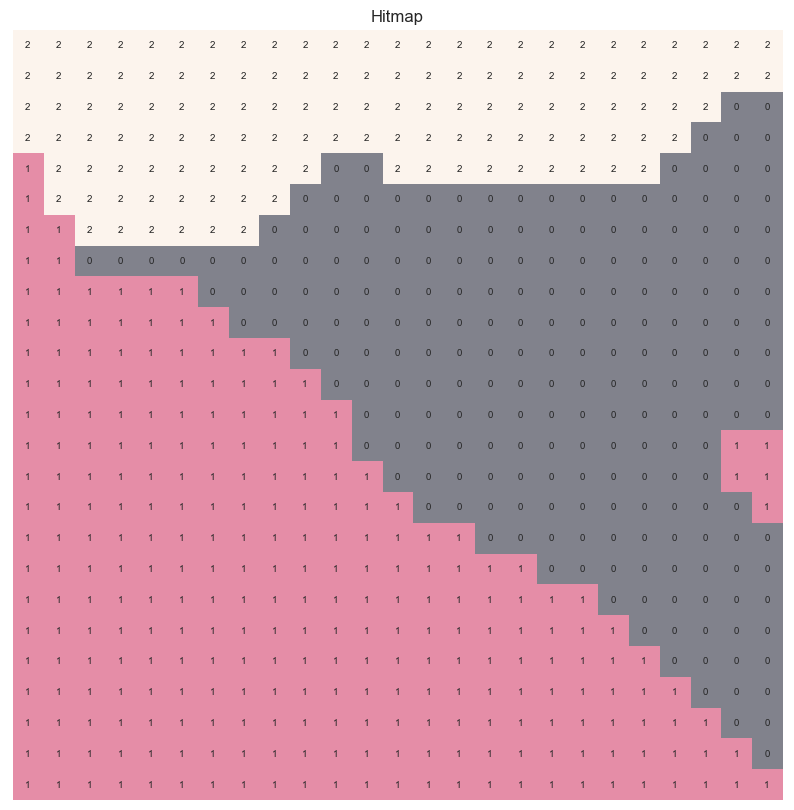

In [211]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [212]:
dataAcademicDF['bmu'] = bmus
dataAcademicDF['label'] = labels[dataAcademicDF['bmu']]

academicResults=dataDF.copy(deep=True)
academicResults['label']=dataAcademicDF['label']

C:\Users\carva\AppData\Local\Temp\ipykernel_21956\2266322349.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
C:\Users\carva\AppData\Local\Temp\ipykernel_21956\2266322349.py:19: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
C:\Users\carva\AppData\Local\Temp\ipykernel_21956\2266322349.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cluster_labels)


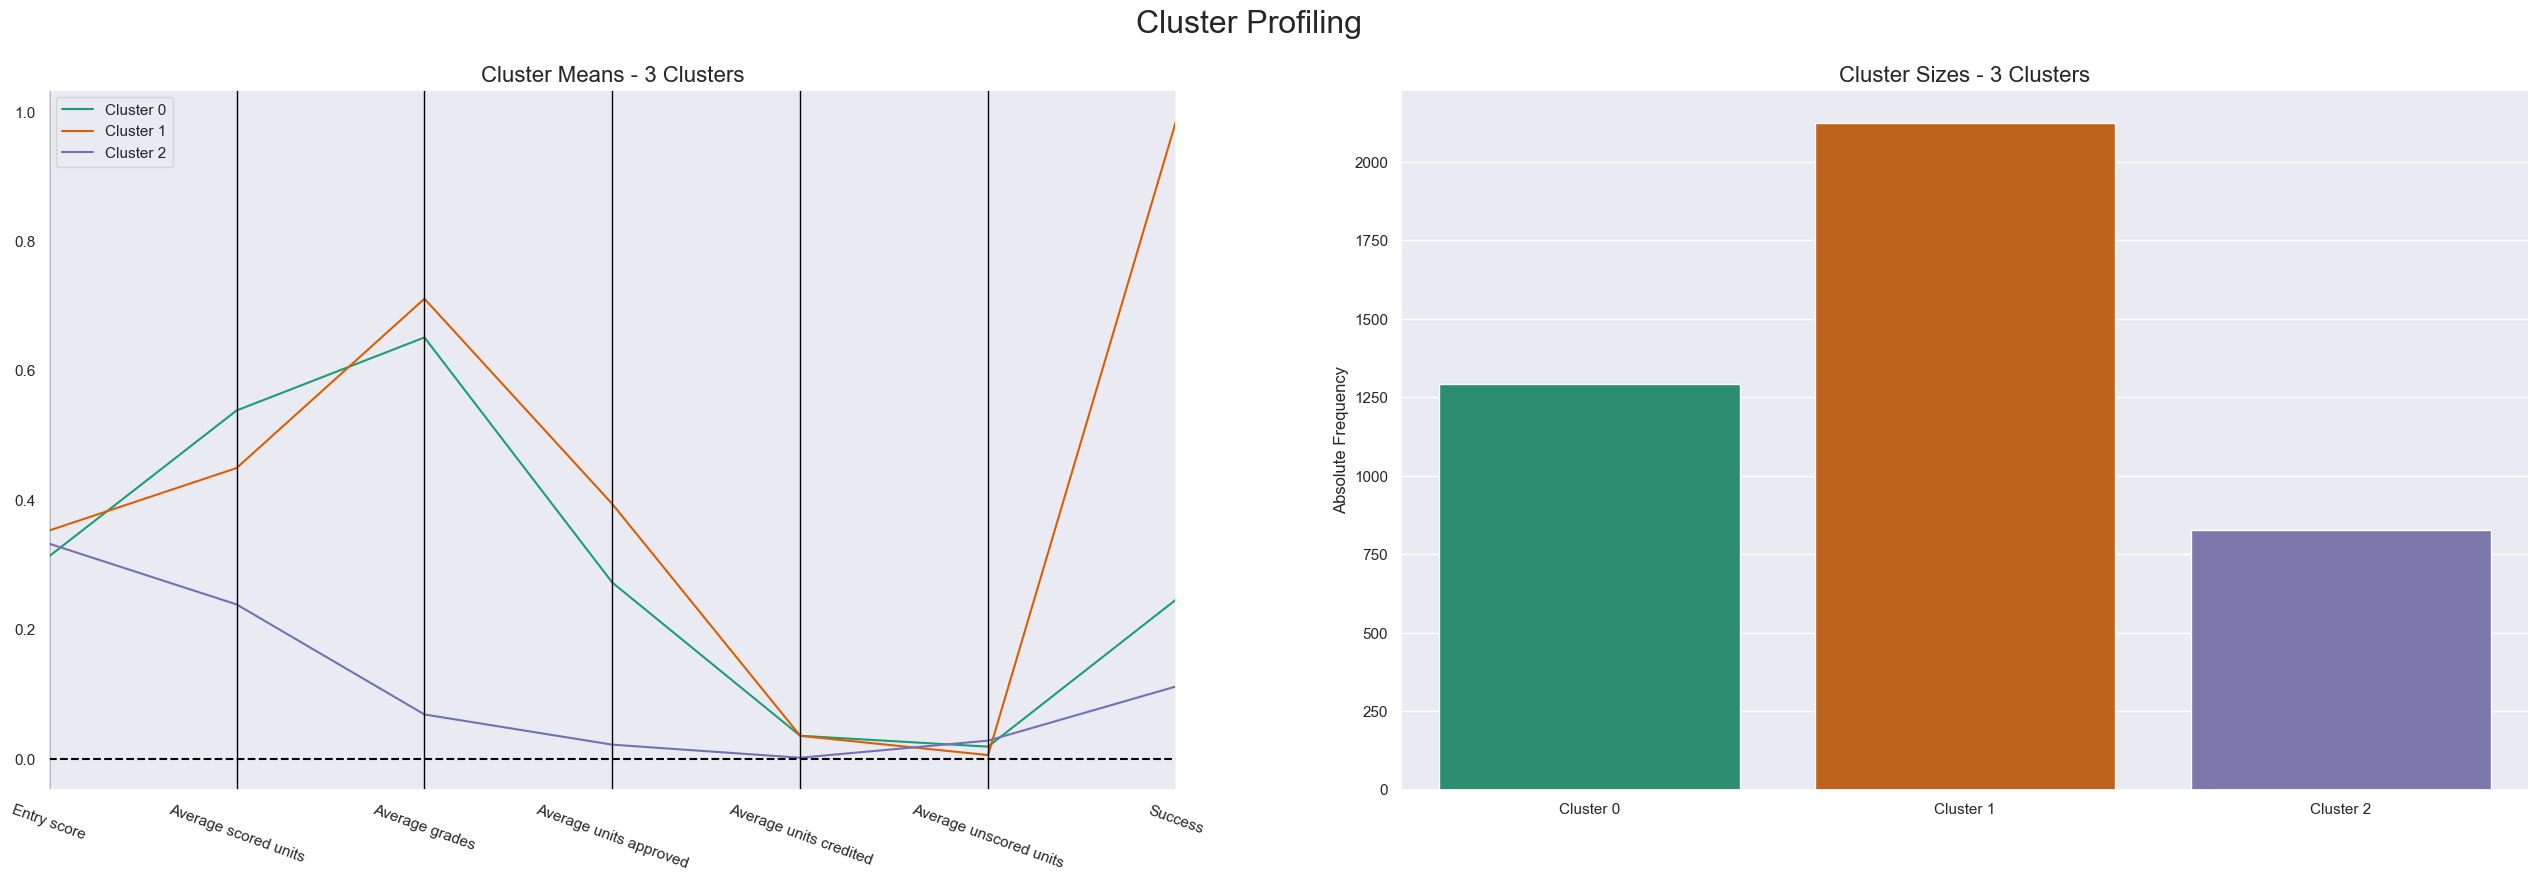

In [213]:
cluster_profiles(dataAcademicDF[academicData].join(dataAcademicDF['label']),["label"],figsize=(32, 10))

  0%|          | 0/7 [00:00<?, ?it/s]

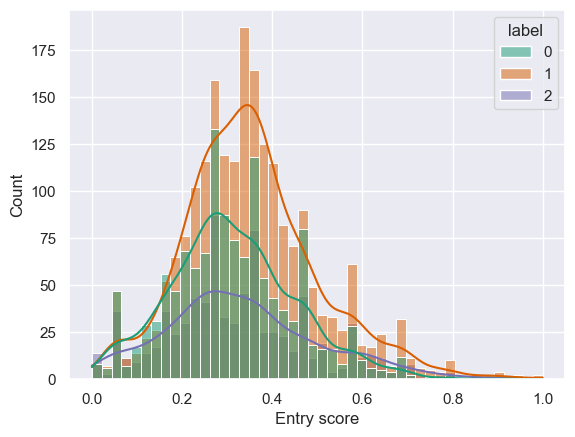

 14%|█▍        | 1/7 [00:00<00:05,  1.18it/s]

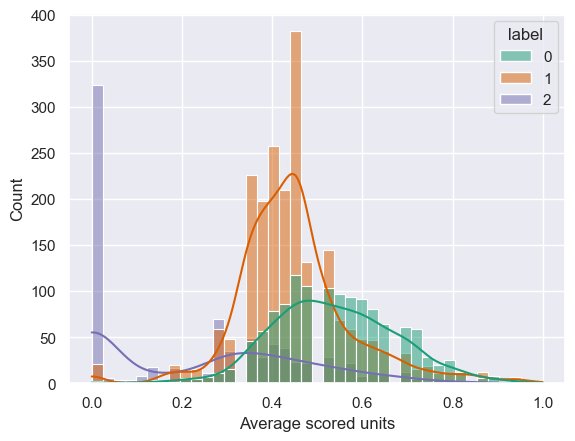

 29%|██▊       | 2/7 [00:01<00:03,  1.30it/s]

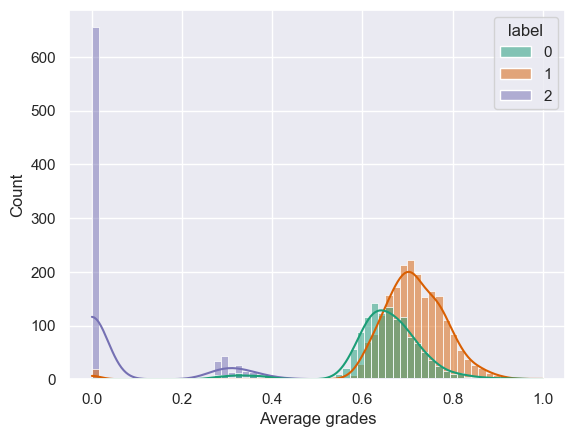

 43%|████▎     | 3/7 [00:02<00:03,  1.10it/s]

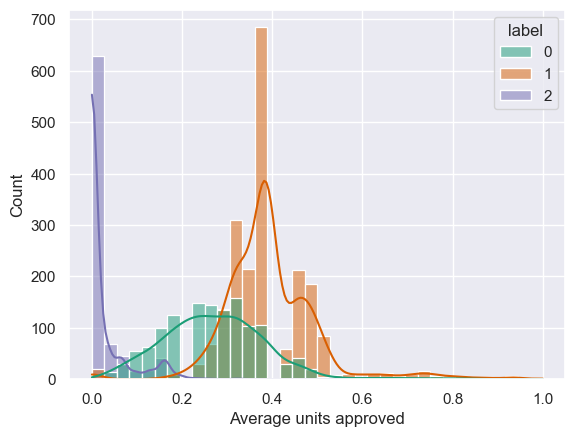

 57%|█████▋    | 4/7 [00:04<00:04,  1.36s/it]

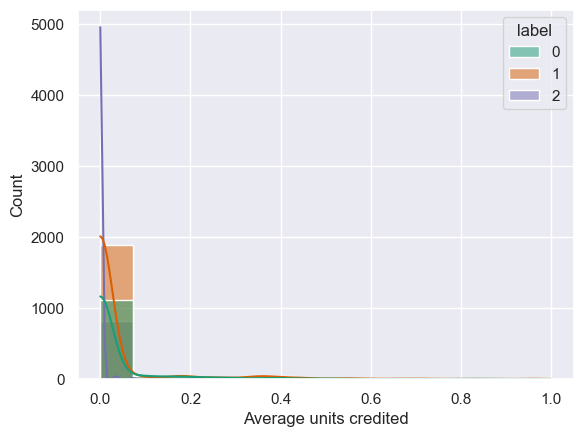

 71%|███████▏  | 5/7 [00:06<00:03,  1.58s/it]

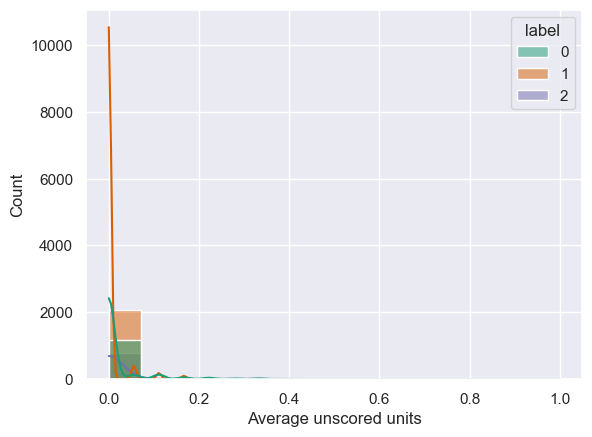

 86%|████████▌ | 6/7 [00:09<00:02,  2.04s/it]

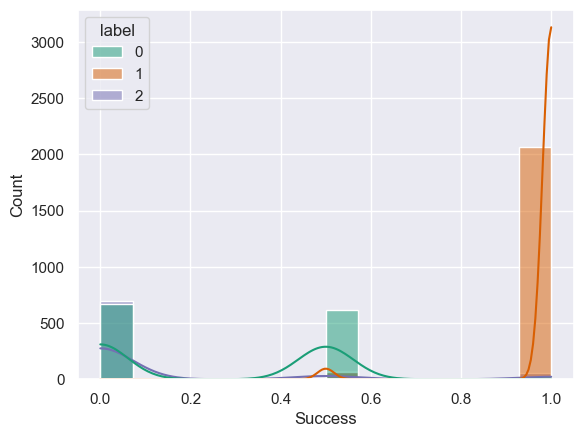

100%|██████████| 7/7 [00:10<00:00,  1.45s/it]


In [214]:
for i in tqdm(dataAcademicDF[academicData].columns):
    sns.histplot(dataAcademicDF, x = i, hue='label', kde = True, legend = True, palette = 'Dark2')
    plt.show()

In [215]:
academicData.remove('Average unscored units')
academicData.remove('Average units credited')

In [216]:
data = encodeSuccess(dataDF)
data = fillNa(data)
data = removeOutliers(data)
data = groupValues(data)
dataAcademicDF = data[academicData]
dataAcademic = getDummies(dataAcademicDF)
dataAcademic, academicScaler = scaleData(dataAcademicDF)
data = getDummies(data)
data, scaler = scaleData(data)
dataAcademicDF, academicScaler=scaleData(dataAcademicDF)

C:\Users\carva\AppData\Local\Temp\ipykernel_21956\3712914929.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Father\'s qualification'].replace(education,inplace=True)
C:\Users\carva\AppData\Local\Temp\ipykernel_21956\3712914929.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

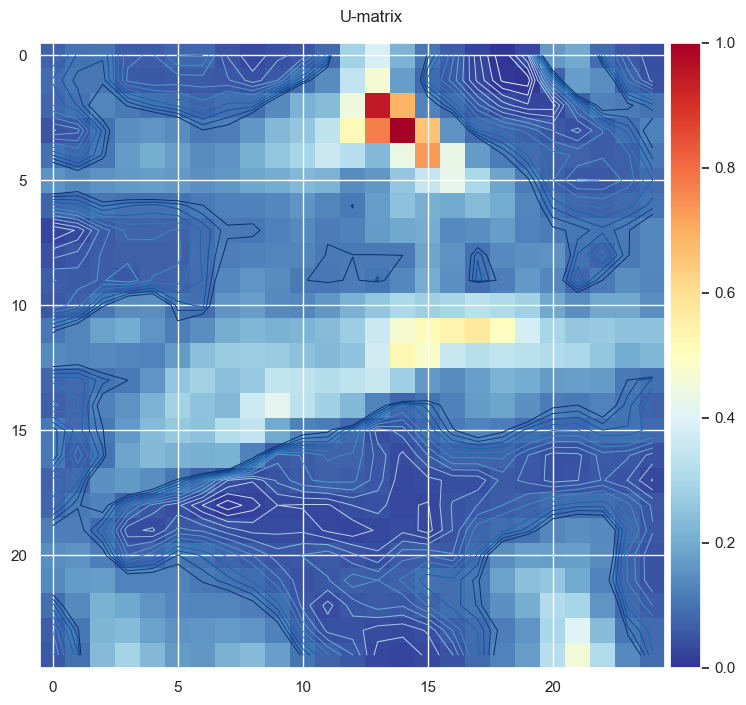

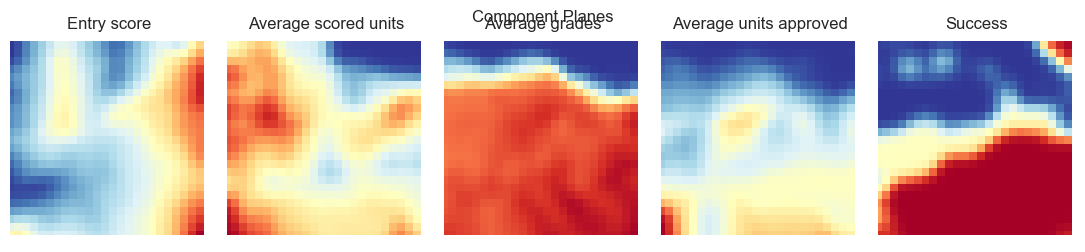

In [217]:
som=somFunc(np.float32(dataAcademicDF),25,25,True,True,dataAcademicDF.columns)

In [218]:
dataAcademicDF['bmu'] = bmus
dataAcademicDF['label'] = labels[dataAcademicDF['bmu']]

academicResults=dataDF.copy(deep=True)
academicResults['label']=dataAcademicDF['label']

C:\Users\carva\AppData\Local\Temp\ipykernel_21956\2266322349.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
C:\Users\carva\AppData\Local\Temp\ipykernel_21956\2266322349.py:19: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)
C:\Users\carva\AppData\Local\Temp\ipykernel_21956\2266322349.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cluster_labels)


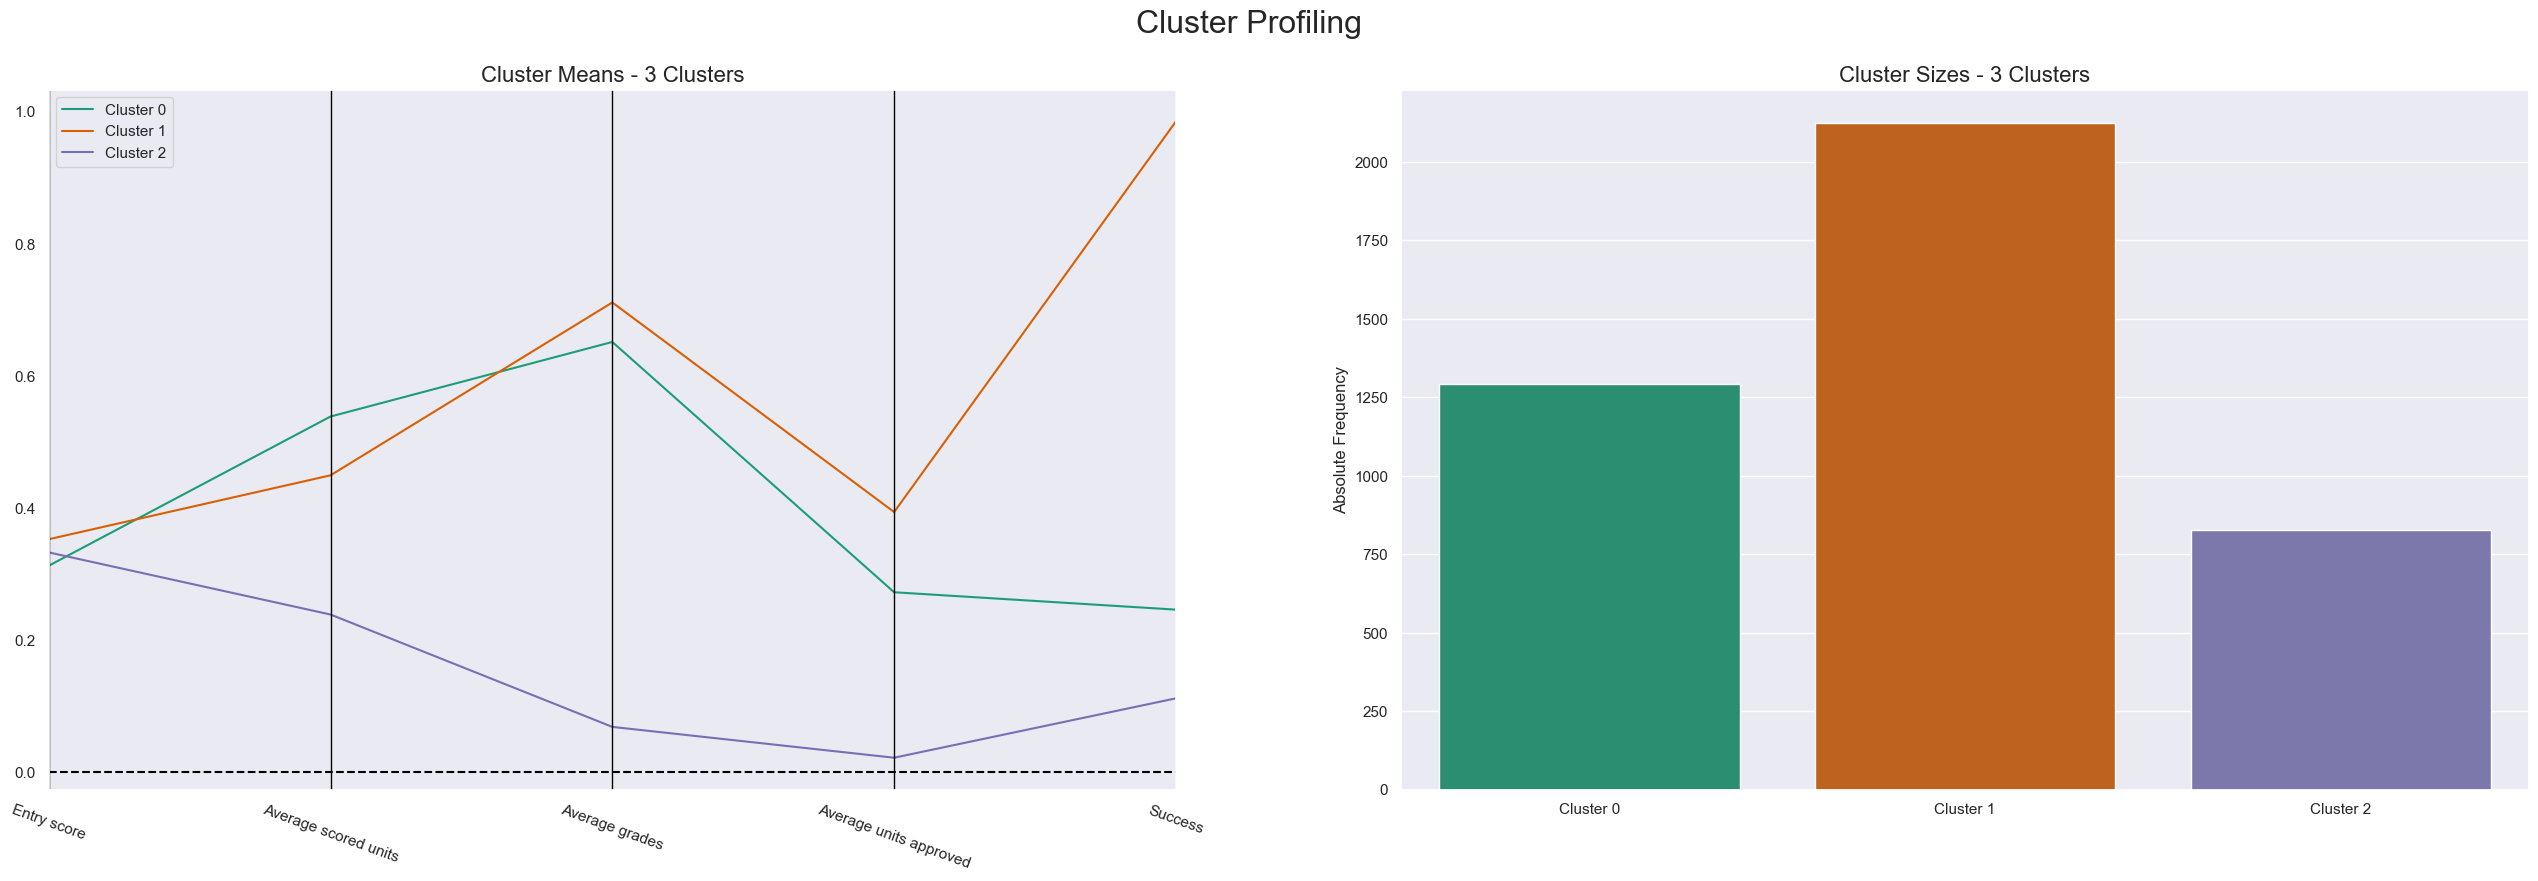

In [219]:
cluster_profiles(dataAcademicDF[academicData].join(dataAcademicDF['label']),["label"],figsize=(32, 10))

  0%|          | 0/5 [00:00<?, ?it/s]

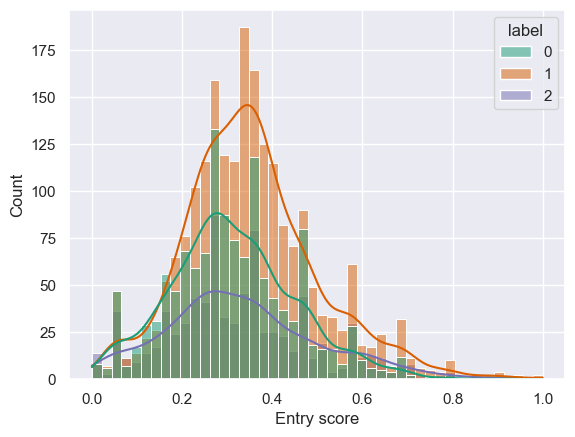

 20%|██        | 1/5 [00:02<00:08,  2.17s/it]

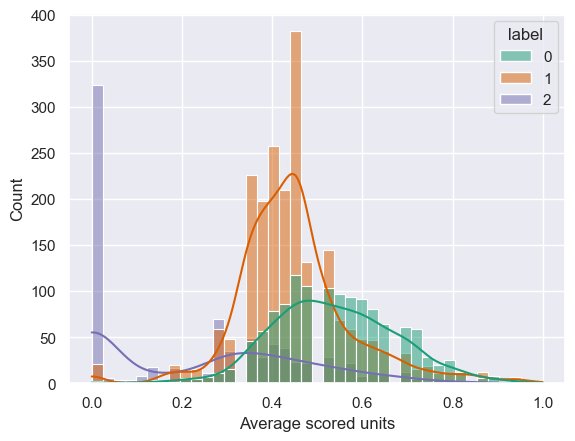

 40%|████      | 2/5 [00:02<00:04,  1.34s/it]

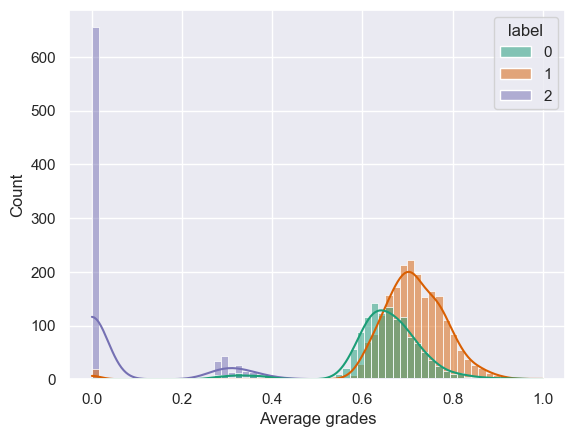

 60%|██████    | 3/5 [00:03<00:02,  1.22s/it]

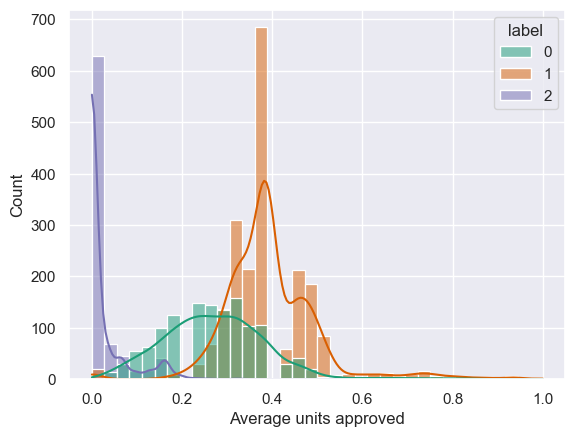

 80%|████████  | 4/5 [00:05<00:01,  1.17s/it]

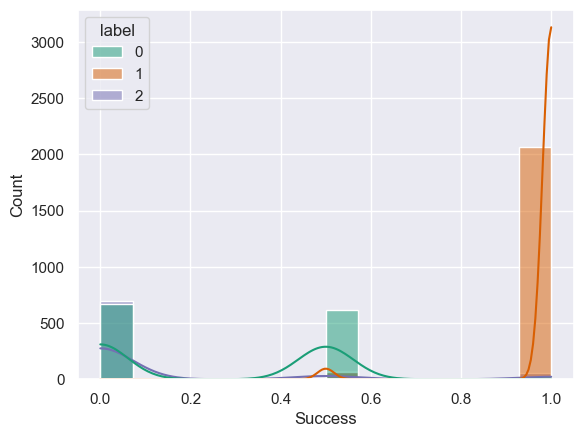

100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


In [220]:
for i in tqdm(dataAcademicDF[academicData].columns):
    sns.histplot(dataAcademicDF, x = i, hue='label', kde = True, legend = True, palette = 'Dark2')
    plt.show()

In [221]:
academicResults[academicData+['label']].groupby(['label']).describe().T

label                                   0            1           2
Entry score            count  1293.000000  2124.000000  828.000000
                       mean    124.673241   128.483192  126.596739
                       std      13.225152    14.211559   16.297670
                       min      95.000000    95.000000   95.000000
                       25%     116.000000   119.475000  116.275000
                       50%     123.500000   127.200000  124.900000
                       75%     132.100000   136.000000  135.650000
                       max     180.400000   190.000000  190.000000
Average scored units   count  1293.000000  2124.000000  828.000000
                       mean      9.418407     7.861347    4.174517
                       std       2.396647     2.277800    3.968822
                       min       0.000000     0.000000    0.000000
                       25%       8.000000     6.500000    0.000000
                       50%       9.500000     7.500000    5.000000
                       75%      11.000000     9.000000    7.000000
                       max      17.000000    17.500000   15.500000
Average grades         count  1293.000000  2124.000000  828.000000
                       mean     11.903507    12.997254    1.251894
                       std       1.665570     1.725625    2.504161
                       min       5.000000     0.000000    0.000000
                       25%      11.250000    12.273214    0.000000
                       50%      11.966667    13.000000    0.000000
                       75%      12.757143    13.916667    0.000000
                       max      17.166667    18.283654   13.670000
Average units approved count  1293.000000  2124.000000  828.000000
                       mean      4.220031     6.101695    0.338164
                       std       1.774791     1.661545    0.751310
                       min       0.500000     0.000000    0.000000
                       25%       3.000000     5.000000    0.000000
                       50%       4.000000     6.000000    0.000000
                       75%       5.500000     7.000000    0.000000
                       max      13.000000    15.500000    5.000000
Success                count  1293.000000  2124.000000  828.000000
                       mean      0.491879     1.969868    0.223430
                       std       0.512359     0.173723    0.556011
                       min       0.000000     0.000000    0.000000
                       25%       0.000000     2.000000    0.000000
                       50%       0.000000     2.000000    0.000000
                       75%       1.000000     2.000000    0.000000
                       max       2.000000     2.000000    2.000000

# Demographic K means

In [222]:
# demographicData=['Mother\'s qualification','Father\'s qualification']
# demographicData=['Mother\'s occupation','Father\'s occupation']
# demographicData=['Age at enrollment','Marital status','Special needs']
demographicData: list[str] = ['Age at enrollment','Marital status','Course','Previous qualification','Nationality','Mother\'s qualification',
       'Father\'s qualification','Mother\'s occupation','Father\'s occupation','Special needs','International','Debtor','Regularized Fees','Gender_Male']


In [223]:
data = encodeSuccess(dataDF)
data = fillNa(data)
data = removeOutliers(data)
data = groupValues(data)
dataDFGrouped=removeOutliers(dataDF)
dataDFGrouped=groupValues(dataDFGrouped)
dataDemographicDF = data[demographicData]
dataDemographicDF = getDummies(dataDemographicDF)
dataDemographicDF, demoScaler = scaleData(dataDemographicDF)
data = getDummies(data)
data, scaler = scaleData(data)

C:\Users\carva\AppData\Local\Temp\ipykernel_21956\3712914929.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Father\'s qualification'].replace(education,inplace=True)
C:\Users\carva\AppData\Local\Temp\ipykernel_21956\3712914929.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

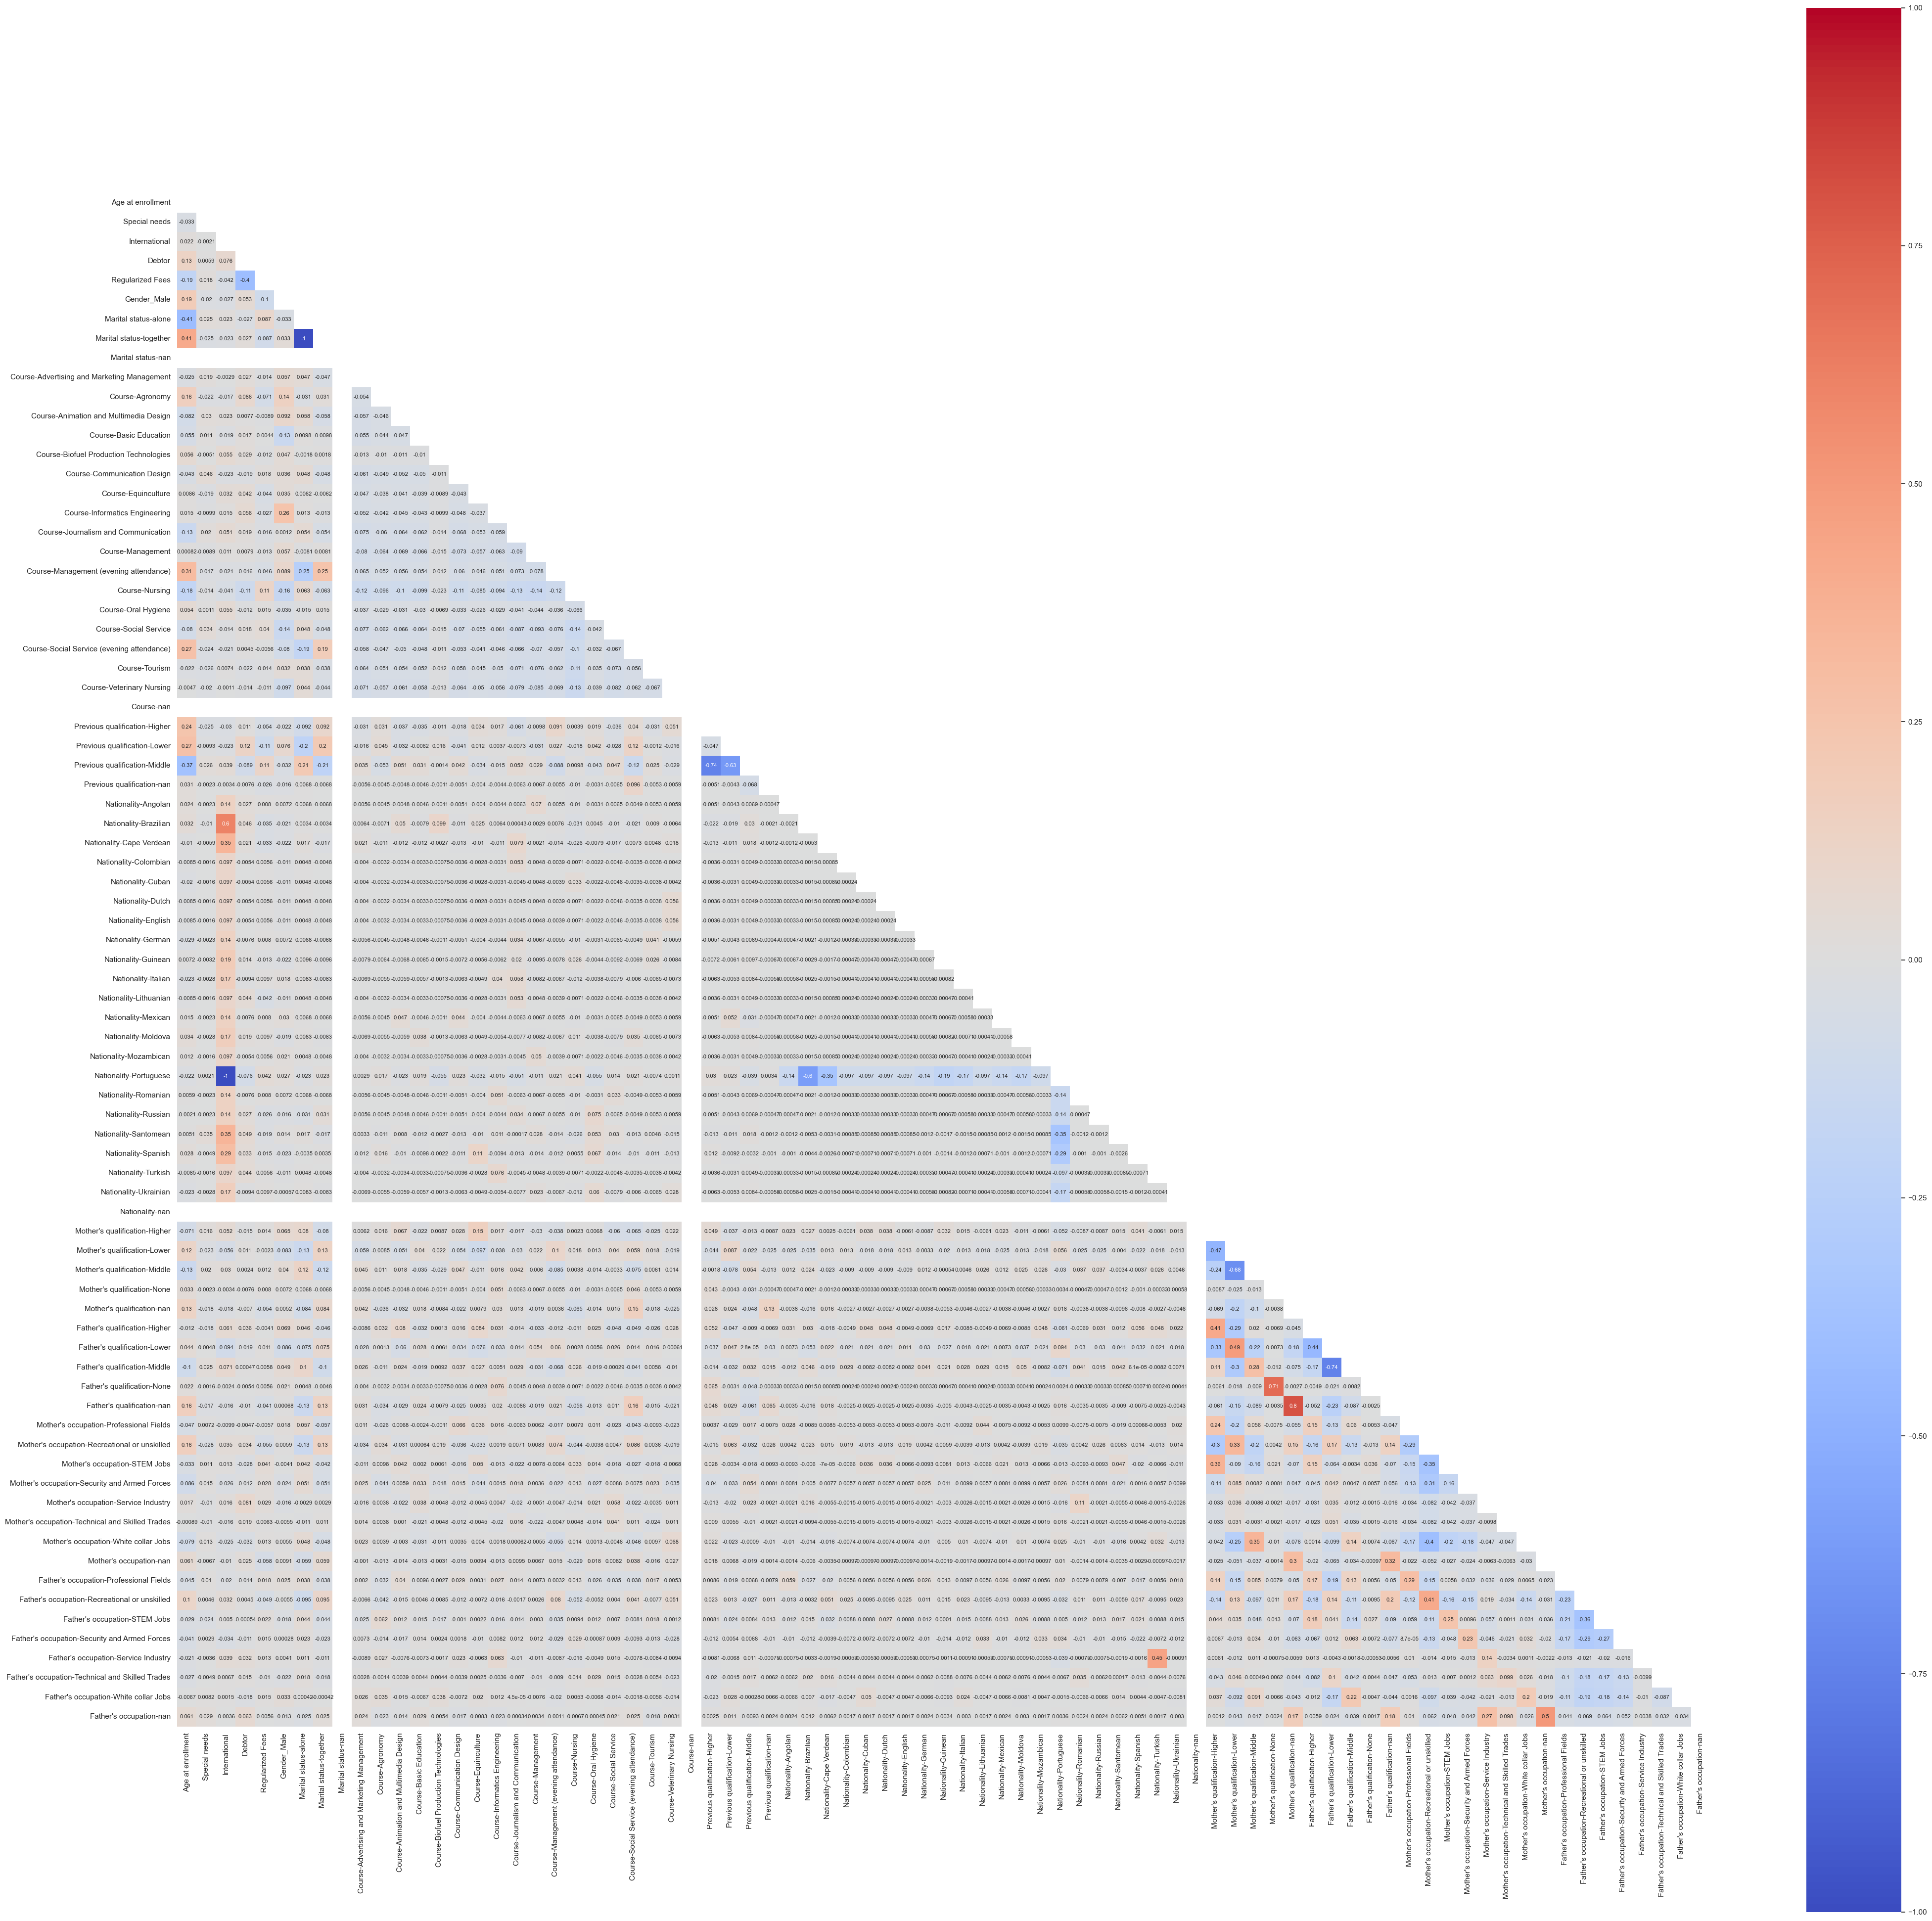

In [224]:
mask = np.zeros_like(dataDemographicDF.corr("spearman"))
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(50,50))
    ax = sns.heatmap(dataDemographicDF.corr("spearman"),mask=mask, annot = True,cmap='coolwarm',square=True,vmin=-1, vmax=1)

In [225]:
cor_spearman = dataDemographicDF[dataDemographicDF.columns].corr(method='spearman')
cor_spearman

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# display only highly correlated (>=90%) features
threshold=0.8

mask = cor_spearman.abs() > threshold

high_cor = cor_spearman[mask].stack().reset_index()
high_cor.columns = ['Feature 1', 'Feature 2', 'Correlation']

# filter out where Feature1==Feature2
mask = high_cor['Feature 1'] == high_cor['Feature 2']
high_cor_filtered = high_cor[~mask]

high_cor_filtered

Feature 1                   Feature 2  Correlation
3                International      Nationality-Portuguese    -1.000000
8         Marital status-alone     Marital status-together    -1.000000
9      Marital status-together        Marital status-alone    -1.000000
46      Nationality-Portuguese               International    -1.000000
59  Mother's qualification-nan  Father's qualification-nan     0.802756
64  Father's qualification-nan  Mother's qualification-nan     0.802756

In [226]:
toRemove=['Nationality-Portuguese','Marital status-together','Mother\'s qualification-nan','Previous qualification-Higher'
          ]

In [227]:
dataDemographicDF.drop(toRemove,axis=1,inplace=True)
toRemove=[]

In [228]:
from sklearn.cluster import KMeans

In [229]:
# #setting range for possible values o k - 1 to 12
# ks = range(1, 20)
# inertias = [] #Creating pretty list to store results in

# for k in tqdm(ks):
#     # Create a KMeans instance with k clusters: model
#     model = KMeans(n_clusters=k)

#     # Fit model to samples
#     model.fit(dataDemographicDF)

#     # Append the inertia to the list of inertias
#     inertias.append(model.inertia_)

### elbow

In [230]:
# # Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
# plt.plot(ks, inertias)

# # define the label for x axis as 'k'
# plt.xlabel('k')
# # define the label for y axis as 'SSD'
# plt.ylabel('SSD to cluster center')
# # define the ticks in x axis using the values of ks
# plt.xticks(ks)
# # call plt.show()
# plt.show()

In [231]:
# #setting range for possible values o k - 1 to 12
# for i in range(71,101):
#     ks = range(1, 20)
#     inertias = [] #Creating pretty list to store results in

#     for k in tqdm(ks):
#         # Create a KMeans instance with k clusters: model
#         model = KMeans(n_clusters=k, random_state=i)

#         # Fit model to samples
#         model.fit(dataDemographicDF)

#         # Append the inertia to the list of inertias
#         inertias.append(model.inertia_)

#     print(f"random_state={i}")
#     # Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
#     plt.plot(ks, inertias)

#     # define the label for x axis as 'k'
#     plt.xlabel('k')
#     # define the label for y axis as 'SSD'
#     plt.ylabel('SSD to cluster center')
#     # define the ticks in x axis using the values of ks
#     plt.xticks(ks)
#     # call plt.show()
#     plt.show()

### Silhuette score

In [232]:
# from sklearn.metrics import silhouette_score

# ##setting range for possible values o k - 2 to 12
# ks = range(2, 21)
# sil_score = [] #Creating pretty list to store results in

# for k in tqdm(ks):
# #    # Create a KMeans instance with k clusters: model
#    model = KMeans(n_clusters=k, random_state=0)

# #    # Fit model to samples
#    model.fit_predict(dataDemographicDF)

# #    # Calculate Silhoutte Score
#    sil_score.append(silhouette_score(dataDemographicDF, model.labels_, metric='euclidean'))

In [233]:
# plt.plot(ks, sil_score)

# ## define the label for x axis as 'k'
# plt.xlabel('k')
# ## define the label for y axis as 'Silhouette Score'
# plt.ylabel('Sillhouette Score')
# ## define the ticks in x axis using the values of ks
# plt.xticks(ks)
# ## call plt.show()
# plt.show()

In [234]:
# from sklearn.metrics import silhouette_score

# for i in range(71,101):
#    ##setting range for possible values o k - 2 to 12
#    ks = range(2, 21)
#    sil_score = [] #Creating pretty list to store results in

#    for k in tqdm(ks):
#    #    # Create a KMeans instance with k clusters: model
#       model = KMeans(n_clusters=k, random_state=i)

#    #    # Fit model to samples
#       model.fit_predict(dataDemographicDF)

#    #    # Calculate Silhoutte Score
#       sil_score.append(silhouette_score(dataDemographicDF, model.labels_, metric='euclidean'))
#    print(f"random_state={i}")

#    plt.plot(ks, sil_score)

#    ## define the label for x axis as 'k'
#    plt.xlabel('k')
#    ## define the label for y axis as 'Silhouette Score'
#    plt.ylabel('Sillhouette Score')
#    ## define the ticks in x axis using the values of ks
#    plt.xticks(ks)
#    ## call plt.show()
#    plt.show()

### Hierarchical

In [235]:
# from scipy.cluster import hierarchy
# ##from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# ## create clusters using the "ward method"
# clusters = hierarchy.linkage(dataDemographicDF, method="ward")

# ## create the dendrogram using the hierarchy.dendrogram() method.
# plt.figure(figsize=(8, 6))
# dendrogram = hierarchy.dendrogram(clusters)
# plt.show()
# #plt.savefig("images/Hierarchical_results_artist_perspective.png", dpi=300)

In [236]:
kmeans_2 = KMeans(n_clusters = 3, random_state = 100).fit(dataDemographicDF)

In [237]:
dataDemographicDF['label'] = kmeans_2.predict(dataDemographicDF)

In [238]:
#profiling the cluster with the function
# cluster_profiles(dataDemographicDF, ["label"], figsize=(300, 10))

Many of the features have a low variability between clusters, so will be removed

### Removing low variance features

In [239]:
nationality = [s for s in dataDemographicDF.columns if s.startswith("Nationality")]
course=[s for s in dataDemographicDF.columns if s.startswith("Course")]
prevQual=[s for s in dataDemographicDF.columns if s.startswith("Previous qualification")]


In [240]:
toRemove=['Special needs','International','Debtor','Regularized Fees','Marital status-nan',
          'Father\'s qualification-None','Mother\'s occupation-Service Industry',
          'Mother\'s occupation-White collar Jobs','Father\'s occupation-Professional Fields',
          'Father\'s occupation-Service Industry','Father\'s occupation-Technical and Skilled Trades',
          'Father\'s occupation-White collar Jobs','Father\'s occupation-nan',
          'Mother\'s qualification-None',
          'Mother\'s occupation-Technical and Skilled Trades',
          'Mother\'s occupation-nan','Father\'s occupation-Security and Armed Forces',
          'Father\'s qualification-nan']

In [241]:
dataDemographicDF.drop(nationality,inplace=True,axis=1)
dataDemographicDF.drop(course,inplace=True,axis=1)
dataDemographicDF.drop(prevQual,inplace=True,axis=1)
dataDemographicDF.drop(toRemove,inplace=True,axis=1)

In [242]:
# for i in toRemove:
#     print(f"'{i}',")
# for i in nationality:
#     print(f"'{i}',")
# for i in course:
#     print(f"'{i}',")
# for i in prevQual:
#     print(f"'{i}',")


In [243]:
# #setting range for possible values o k - 1 to 12
# ks = range(1, 20)
# inertias = [] #Creating pretty list to store results in

# for k in tqdm(ks):
#     # Create a KMeans instance with k clusters: model
#     model = KMeans(n_clusters=k, random_state=51)

#     # Fit model to samples
#     model.fit(dataDemographicDF)

#     # Append the inertia to the list of inertias
#     inertias.append(model.inertia_)

### Elbow

In [244]:
# # Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
# plt.plot(ks, inertias)

# # define the label for x axis as 'k'
# plt.xlabel('k')
# # define the label for y axis as 'SSD'
# plt.ylabel('SSD to cluster center')
# # define the ticks in x axis using the values of ks
# plt.xticks(ks)
# # call plt.show()
# plt.show()

### Silhuette score

In [245]:
# from sklearn.metrics import silhouette_score

# ##setting range for possible values o k - 2 to 12
# ks = range(2, 20)
# sil_score = [] #Creating pretty list to store results in

# for k in tqdm(ks):
# #    # Create a KMeans instance with k clusters: model
#    model = KMeans(n_clusters=k)

# #    # Fit model to samples
#    model.fit_predict(dataDemographicDF)

# #    # Calculate Silhoutte Score
#    sil_score.append(silhouette_score(dataDemographicDF, model.labels_, metric='euclidean'))

In [246]:
# plt.plot(ks, sil_score)

# ## define the label for x axis as 'k'
# plt.xlabel('k')
# ## define the label for y axis as 'Silhouette Score'
# plt.ylabel('Sillhouette Score')
# ## define the ticks in x axis using the values of ks
# plt.xticks(ks)
# ## call plt.show()
# plt.show()

### Hierarchical

In [247]:
# from scipy.cluster import hierarchy
# ##from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# ## create clusters using the "ward method"
# clusters = hierarchy.linkage(dataDemographicDF, method="ward")

# ## create the dendrogram using the hierarchy.dendrogram() method.
# plt.figure(figsize=(8, 6))
# dendrogram = hierarchy.dendrogram(clusters)
# plt.show()
# #plt.savefig("images/Hierarchical_results_artist_perspective.png", dpi=300)

In [248]:
kmeans_2 = KMeans(n_clusters = 3, random_state = 100).fit(dataDemographicDF)

In [249]:
dataDemographicDF['label'] = kmeans_2.predict(dataDemographicDF)

In [250]:
#profiling the cluster with the function
# cluster_profiles(dataDemographicDF, ["label"], figsize=(300, 10))

In [251]:
# for i in tqdm(dataDemographicDF.columns):
#     sns.histplot(dataDemographicDF, x = i, hue='label', kde = True, legend = True, palette = 'Dark2')
#     plt.show()

### DF describe

In [252]:
dataDemographicDF.groupby(['label']).describe().T

label                                                         0            1  \
Age at enrollment                             count  958.000000  1672.000000   
                                              mean     0.153130     0.078835   
                                              std      0.165481     0.092421   
                                              min      0.018868     0.000000   
                                              25%      0.037736     0.018868   
                                              50%      0.075472     0.037736   
                                              75%      0.226415     0.075472   
                                              max      0.811321     0.849057   
Gender_Male                                   count  958.000000  1672.000000   
                                              mean     0.327766     0.396531   
                                              std      0.469644     0.489323   
                                              min      0.000000     0.000000   
                                              25%      0.000000     0.000000   
                                              50%      0.000000     0.000000   
                                              75%      1.000000     1.000000   
                                              max      1.000000     1.000000   
Marital status-alone                          count  958.000000  1672.000000   
                                              mean     0.841336     0.968301   
                                              std      0.365553     0.175249   
                                              min      0.000000     0.000000   
                                              25%      1.000000     1.000000   
                                              50%      1.000000     1.000000   
                                              75%      1.000000     1.000000   
                                              max      1.000000     1.000000   
Mother's qualification-Higher                 count  958.000000  1672.000000   
                                              mean     0.007307     0.346890   
                                              std      0.085212     0.476123   
                                              min      0.000000     0.000000   
                                              25%      0.000000     0.000000   
                                              50%      0.000000     0.000000   
                                              75%      0.000000     1.000000   
                                              max      1.000000     1.000000   
Mother's qualification-Lower                  count  958.000000  1672.000000   
                                              mean     0.835073     0.022129   
                                              std      0.371308     0.147148   
                                              min      0.000000     0.000000   
                                              25%      1.000000     0.000000   
                                              50%      1.000000     0.000000   
                                              75%      1.000000     0.000000   
                                              max      1.000000     1.000000   
Mother's qualification-Middle                 count  958.000000  1672.000000   
                                              mean     0.064718     0.617225   
                                              std      0.246156     0.486210   
                                              min      0.000000     0.000000   
                                              25%      0.000000     0.000000   
                                              50%      0.000000     1.000000   
                                              75%      0.000000     1.000000   
                                              max      1.000000     1.000000   
Father's qualification-Higher                 count  958.000000  1672.000000   


# Joining perspectives

In [253]:
data = pd.DataFrame(scaler.inverse_transform(data), index=data.index, columns=data.columns)

In [254]:
data['academic_profile']=academicResults['label']
data['demographic_profile']=dataDemographicDF['label']

In [255]:
data['final_groups'] = data.groupby(['academic_profile', 'demographic_profile'], sort = False).ngroup()

In [256]:
unusedColumns=[s for s in data.columns if s not in dataDemographicDF.columns]
unusedColumns2=[s for s in data.columns if s not in academicData]

In [257]:
unusedColumns = set(unusedColumns)
unusedColumns2 = set(unusedColumns2)

unusedColumns.difference(unusedColumns2)
unusedColumns2.difference(unusedColumns)

usedColumnsAll=unusedColumns.difference(unusedColumns2).union(unusedColumns2.difference(unusedColumns))
usedColumnsAll

unusedColumnsAll=set(data.columns.difference(usedColumnsAll))
unusedColumnsAll

{'Application mode',
 'Application order',
 'Average grade 1st period',
 'Average grade 2nd period',
 'Average units credited',
 'Average units taken',
 'Average unscored units',
 'Course-Advertising and Marketing Management',
 'Course-Agronomy',
 'Course-Animation and Multimedia Design',
 'Course-Basic Education',
 'Course-Biofuel Production Technologies',
 'Course-Communication Design',
 'Course-Equinculture',
 'Course-Informatics Engineering',
 'Course-Journalism and Communication',
 'Course-Management',
 'Course-Management (evening attendance)',
 'Course-Nursing',
 'Course-Oral Hygiene',
 'Course-Social Service',
 'Course-Social Service (evening attendance)',
 'Course-Tourism',
 'Course-Veterinary Nursing',
 'Course-nan',
 'Debtor',
 'Displaced',
 'External Funding',
 "Father's occupation-Professional Fields",
 "Father's occupation-Security and Armed Forces",
 "Father's occupation-Service Industry",
 "Father's occupation-Technical and Skilled Trades",
 "Father's occupation-White co

In [258]:
unusedColumnsAll.remove('final_groups')

In [259]:
profiling_df=data.copy().drop(unusedColumnsAll,axis=1)

In [260]:
# cluster_profiles(profiling_df, ["final_groups"], figsize=(200, 10))

In [261]:
# for i in tqdm(profiling_df.drop('final_groups', axis = 1).columns):
#     sns.histplot(profiling_df, x = i, hue='final_groups', kde = True, legend = True, palette = 'Dark2')
#     plt.show()

In [262]:
profiling_df.groupby(['final_groups']).describe().T

final_groups                                                  0           1  \
Entry score                                   count  824.000000  500.000000   
                                              mean   129.000121  124.739000   
                                              std     14.776237   13.020409   
                                              min     96.000000   95.000000   
                                              25%    119.775000  116.300000   
                                              50%    127.800000  123.300000   
                                              75%    136.925000  132.925000   
                                              max    190.000000  170.000000   
Gender_Male                                   count  824.000000  500.000000   
                                              mean     0.275485    0.370000   
                                              std      0.447030    0.483288   
                                              min      0.000000    0.000000   
                                              25%      0.000000    0.000000   
                                              50%      0.000000    0.000000   
                                              75%      1.000000    1.000000   
                                              max      1.000000    1.000000   
Age at enrollment                             count  824.000000  500.000000   
                                              mean    20.304612   24.442000   
                                              std      4.189981    8.146125   
                                              min     17.000000   18.000000   
                                              25%     18.000000   19.000000   
                                              50%     19.000000   20.000000   
                                              75%     20.000000   27.000000   
                                              max     62.000000   55.000000   
Success                                       count  824.000000  500.000000   
                                              mean     1.964806    0.524000   
                                              std      0.184382    0.507878   
                                              min      1.000000    0.000000   
                                              25%      2.000000    0.000000   
                                              50%      2.000000    1.000000   
                                              75%      2.000000    1.000000   
                                              max      2.000000    2.000000   
Average grades                                count  824.000000  500.000000   
                                              mean    13.071855   11.803748   
                                              std      1.931791    1.591590   
                                              min      0.000000    5.000000   
                                              25%     12.339583   11.200000   
                                              50%     13.166667   11.870833   
                                              75%     14.054167   12.625000   
                                              max     18.283654   17.166667   
Average scored units                          count  824.000000  500.000000   
                                              mean     7.807039    9.554000   
                                              std      2.381153    2.340735   
                                              min      0.000000    0.000000   
                                              25%      6.500000    8.000000   
                                              50%      7.500000    9.500000   
                                              75%      8.500000   11.000000   
                                              max     17.000000   16.000000   
Average units approved                        count  824.000000  500.000000   
                                              mean